In [156]:
from pynq import Overlay
from matplotlib import pyplot as plt
from pynq import allocate

import cv2
import numpy as np
import os
import time

In [157]:
ol = Overlay("../PYNQ_CNN_Accelerator/bitstreams/ver_7/dma_axis_ip_example.bit")

In [124]:
ol.ip_dict

{'example_0': {'type': 'xup:hls:example:7.0',
  'mem_id': 's_axi_control',
  'memtype': 'REGISTER',
  'gpio': {},
  'interrupts': {},
  'parameters': {'C_S_AXI_CONTROL_ADDR_WIDTH': '4',
   'C_S_AXI_CONTROL_DATA_WIDTH': '32',
   'Component_Name': 'dma_axis_ip_example_example_0_3',
   'clk_period': '10',
   'machine': '64',
   'combinational': '0',
   'latency': 'undef',
   'II': 'x',
   'EDK_IPTYPE': 'PERIPHERAL',
   'C_S_AXI_CONTROL_BASEADDR': '0x40000000',
   'C_S_AXI_CONTROL_HIGHADDR': '0x4000FFFF',
   'ADDR_WIDTH': '4',
   'DATA_WIDTH': '32',
   'PROTOCOL': 'AXI4LITE',
   'READ_WRITE_MODE': 'READ_WRITE',
   'FREQ_HZ': '100000000',
   'ID_WIDTH': '0',
   'AWUSER_WIDTH': '0',
   'ARUSER_WIDTH': '0',
   'WUSER_WIDTH': '0',
   'RUSER_WIDTH': '0',
   'BUSER_WIDTH': '0',
   'HAS_BURST': '0',
   'HAS_LOCK': '0',
   'HAS_PROT': '0',
   'HAS_CACHE': '0',
   'HAS_QOS': '0',
   'HAS_REGION': '0',
   'HAS_WSTRB': '1',
   'HAS_BRESP': '1',
   'HAS_RRESP': '1',
   'SUPPORTS_NARROW_BURST': '0',
  

In [125]:
ol.example_0?

In [158]:
dma = ol.axi_dma
dma_send = ol.axi_dma.sendchannel
dma_recv = ol.axi_dma.recvchannel

hls_ip = ol.example_0 

In [159]:
hls_ip.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0)
}

In [160]:
CONTROL_REGISTER = 0x0
hls_ip.write(CONTROL_REGISTER, 0x81) # 0x81 will set bit 0

In [161]:
hls_ip.register_map

RegisterMap {
  CTRL = Register(AP_START=1, AP_DONE=0, AP_IDLE=0, AP_READY=0, RESERVED_1=0, AUTO_RESTART=1, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0)
}

In [162]:
os.environ["OPENCV_LOG_LEVEL"]="SILENT"

# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);
print("capture device is open: " + str(videoIn.isOpened()))

[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (616) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


capture device is open: True


In [163]:
frame = 100

start = time.time()

for i in range(frame):
    ret, frame_vga = videoIn.read()
    #Converts to grayscale and transforms to uint8
#     frame_gray = cv2.cvtColor(frame_vga, cv2.COLOR_BGR2GRAY) 
#     plt.imshow(frame_vga)
#     plt.show()

end = time.time()

print("It took {} seconds".format(end - start))

It took 4.109260559082031 seconds


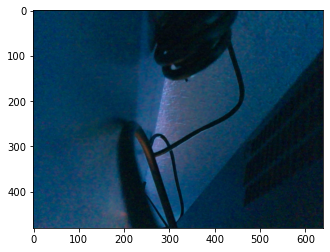

In [154]:
plt.imshow(frame_vga)
plt.show()

In [164]:
from pynq import allocate
import numpy as np

data_size = 307200
input_buffer = allocate(shape=(data_size,), dtype=np.uint32)

In [168]:
frame_vga.shape
print(frame_vga[0,5,0])

141


In [178]:
for row in range(frame_in_h):
    for col in range(frame_in_w):
        input_buffer[(frame_in_w * row) + col] = frame_vga[row,col,0]

In [183]:
dma_send.transfer(input_buffer)

In [184]:
output_buffer = allocate(shape=(data_size,), dtype=np.uint32)

In [185]:
dma_recv.transfer(output_buffer)

In [187]:
for i in range(frame_in_w * frame_in_h):
    print(output_buffer[i])

188
186
236
234
268
282
276
264
268
260
260
248
242
236
230
230
224
238
230
222
224
232
250
246
250
246
252
254
264
256
246
250
236
228
214
214
210
208
214
206
178
176
166
166
132
132
170
176
200
196
216
216
160
156
132
134
174
162
188
186
178
192
190
182
174
178
168
176
168
174
204
216
218
226
242
246
254
258
260
268
256
262
234
236
258
262
278
282
258
246
194
168
128
104
66
18
14
0
12
0
16
16
98
88
96
94
6
8
62
62
36
38
0
8
36
46
52
52
30
26
60
62
94
94
94
94
76
90
88
128
182
214
228
264
278
292
302
310
326
326
340
340
338
336
332
328
322
318
314
306
306
308
278
274
284
280
310
304
312
302
256
268
210
210
218
232
232
218
212
158
122
112
118
98
92
70
76
58
72
58
50
58
62
52
34
48
62
56
22
28
26
26
0
8
44
56
78
82
94
150
192
204
226
226
202
176
150
138
122
58
64
64
88
80
102
106
126
120
136
160
174
174
150
138
120
104
100
86
102
88
82
82
82
80
58
58
58
66
52
56
56
60
84
96
152
154
248
270
328
400
400
500
488
494
494
494
486
486
480
478
426
372
300
252
198
200
166
158
164
168
160
158
17

46
34
16
16
4
20
20
46
32
40
40
30
30
26
28
30
32
8
16
0
4
0
4
44
82
156
182
198
200
220
224
224
218
202
190
172
140
96
60
58
58
72
68
92
104
126
152
180
178
168
166
140
128
88
76
58
48
50
50
54
58
52
38
34
34
50
46
54
52
68
72
106
110
170
184
262
306
344
416
418
504
490
490
498
498
494
494
470
440
394
330
242
228
194
192
194
188
204
204
192
192
178
176
176
176
188
188
196
196
192
192
188
188
192
188
182
182
180
186
184
180
176
176
172
176
160
160
140
140
126
124
128
130
124
120
128
130
148
148
152
152
154
156
150
152
156
158
182
180
188
188
188
180
178
182
184
194
210
218
218
226
234
250
254
258
292
292
316
310
306
304
306
310
318
318
330
330
330
332
334
336
340
342
340
344
334
334
338
336
336
338
334
336
336
338
336
336
332
334
334
334
332
332
336
336
340
340
336
336
336
336
332
332
338
340
340
340
340
340
336
336
340
340
336
334
332
332
330
332
340
342
352
352
356
356
354
356
340
340
338
338
338
336
334
334
334
334
334
332
336
332
328
324
322
320
316
312
310
306
286
270
270
262
260


234
232
222
200
186
172
154
160
148
144
134
138
124
100
86
76
70
56
54
44
46
52
48
52
46
36
34
22
22
40
40
52
50
60
62
60
58
68
78
86
88
106
96
92
92
92
96
120
120
128
130
136
140
138
138
154
156
186
198
236
236
234
232
234
242
258
252
284
294
314
312
314
320
328
328
334
344
340
340
342
340
328
338
324
344
318
334
314
326
306
314
302
312
316
330
322
326
316
322
312
324
326
336
320
320
306
314
312
314
320
320
324
324
328
330
328
328
324
324
328
324
322
324
324
324
328
324
324
324
324
332
326
324
312
312
304
310
324
326
320
314
320
318
310
310
278
252
218
218
196
196
188
192
182
184
174
174
174
174
180
178
174
178
190
190
200
194
208
210
226
232
234
232
226
222
202
200
182
184
188
194
206
208
228
216
216
216
200
198
174
172
164
164
170
172
176
172
168
166
170
174
184
186
186
184
270
264
266
264
258
258
238
234
222
222
226
228
238
238
230
230
206
206
222
218
238
238
242
244
252
252
262
258
258
258
244
244
228
216
196
202
198
200
202
200
214
224
228
218
218
218
200
198
184
184
158
160
152


242
242
218
218
202
202
196
194
190
194
190
188
184
180
178
176
164
166
178
174
194
192
192
184
174
178
168
164
164
170
166
164
142
142
124
126
122
124
150
154
182
186
200
202
200
202
208
210
216
212
216
226
236
234
256
254
246
244
220
206
166
156
118
66
74
30
26
16
12
10
0
2
6
0
0
0
12
4
4
8
12
6
8
12
4
4
0
0
0
0
2
16
54
52
76
80
92
124
166
184
250
314
338
350
356
360
352
350
342
336
334
328
326
326
324
322
324
324
318
312
290
286
286
288
298
290
274
268
236
232
208
214
214
216
212
206
192
164
140
136
112
92
70
44
30
12
18
10
20
10
10
4
14
18
28
32
32
36
24
26
24
26
24
56
64
134
170
156
180
188
210
214
216
222
220
226
226
226
222
214
202
186
176
88
60
50
64
58
84
84
108
122
174
208
206
210
180
170
142
130
102
100
102
72
74
70
50
62
50
42
36
40
46
56
50
52
72
72
124
136
230
230
314
366
386
446
432
506
494
504
510
502
488
472
446
408
338
314
254
240
210
210
210
210
202
202
186
186
188
190
218
224
232
230
224
222
214
210
210
208
202
210
224
222
218
210
208
210
210
214
214
210
210
208
208

224
216
198
200
210
210
206
212
212
212
222
220
234
232
232
232
222
226
216
216
220
218
232
230
240
236
220
222
212
214
220
218
222
220
224
224
226
226
224
222
222
226
226
226
224
224
224
228
232
230
224
222
224
222
216
218
210
212
218
212
212
212
212
210
214
214
214
214
216
216
210
210
228
226
228
224
220
220
202
200
178
178
166
166
164
168
172
168
168
176
172
168
176
174
194
200
204
202
198
196
182
176
172
172
176
176
182
174
194
194
182
182
194
188
180
180
190
186
196
192
202
202
192
190
176
178
198
202
224
228
240
242
250
268
286
300
318
324
344
348
358
356
362
360
368
366
354
348
344
340
330
326
316
314
302
296
286
276
272
262
248
234
214
204
202
196
186
168
156
142
124
106
70
60
24
12
6
2
4
4
38
26
34
30
24
30
28
28
34
38
46
46
54
54
68
66
92
94
84
78
54
54
58
60
64
66
72
68
88
88
122
126
144
144
174
174
182
190
188
194
206
200
230
224
250
252
280
284
280
284
260
266
272
278
292
294
302
302
308
310
312
314
306
316
302
314
322
330
340
350
348
362
346
358
324
330
302
308
302
306
31

328
316
322
310
314
296
304
278
288
284
288
298
304
308
310
322
328
336
340
338
342
340
340
336
336
320
320
304
304
316
320
324
324
320
320
320
318
322
322
324
322
320
322
328
332
332
326
320
324
316
312
316
316
318
314
304
296
268
254
232
222
216
214
190
196
186
178
192
190
218
220
230
232
214
218
208
204
204
198
198
198
194
194
196
200
210
212
204
202
170
170
158
154
168
164
182
184
206
210
214
212
192
190
170
176
156
160
166
160
196
194
214
212
190
192
174
186
176
170
156
156
134
132
272
270
272
270
288
286
290
284
282
282
286
286
278
274
270
270
262
260
252
250
244
242
242
236
244
248
242
236
236
242
228
230
222
222
240
236
232
230
236
236
224
224
222
218
202
196
182
176
188
184
200
200
196
192
168
170
170
168
172
166
134
146
116
120
148
148
160
162
154
158
162
166
162
162
166
178
198
202
214
220
216
226
234
238
250
256
262
264
248
234
210
182
134
108
66
38
46
42
44
44
56
52
52
54
48
52
28
36
20
28
20
4
2
24
16
20
30
38
40
40
34
36
60
60
94
106
158
214
222
282
308
322
322
328
338
3

80
76
100
130
178
224
262
304
326
336
340
340
356
352
356
356
348
348
344
336
328
320
316
316
316
316
312
312
302
298
278
272
260
258
250
246
242
232
232
228
232
216
208
206
170
150
132
120
68
62
58
22
26
12
26
16
22
22
12
16
16
16
16
8
2
2
0
8
12
8
0
16
44
126
188
190
230
228
236
242
242
242
234
234
222
236
234
242
284
298
338
340
350
358
332
254
150
90
60
58
72
70
88
88
122
148
202
212
238
238
202
206
140
104
80
64
36
30
20
18
20
20
40
46
60
54
64
64
78
92
122
142
192
194
264
304
378
412
440
482
482
500
490
496
476
474
436
430
382
372
340
334
316
314
296
296
284
276
280
274
270
268
260
260
254
250
244
242
236
232
234
232
232
232
240
238
230
228
228
226
228
228
234
232
222
226
224
226
226
228
216
218
222
222
232
232
242
244
242
246
246
246
246
242
244
242
230
236
220
224
230
230
248
242
256
264
252
242
242
246
250
252
262
258
266
262
258
262
246
246
236
236
238
234
240
236
236
234
236
236
230
228
218
214
194
200
194
198
196
190
188
190
194
194
204
204
216
212
232
232
236
236
228
232
2

240
266
260
270
274
282
284
284
286
298
302
318
322
316
318
310
318
316
332
310
316
300
320
306
314
316
324
312
322
304
316
310
318
316
324
328
330
330
334
328
334
336
340
354
358
358
358
356
356
352
350
338
336
330
334
340
340
336
334
334
338
340
340
344
344
344
344
350
350
344
344
350
350
342
342
322
320
318
306
274
260
238
230
216
214
194
196
206
202
212
210
210
208
204
208
226
228
242
246
240
236
228
228
230
230
232
234
226
220
192
192
190
198
222
216
226
226
220
226
216
216
206
208
224
226
232
230
228
218
188
188
166
166
150
150
166
166
192
192
210
210
212
208
218
214
224
218
220
218
296
296
276
274
266
270
264
262
264
264
264
264
262
256
240
236
228
232
236
230
230
230
238
244
244
240
232
228
222
224
250
246
250
250
248
250
236
242
250
236
226
224
228
228
222
220
218
218
222
222
230
226
226
226
230
226
222
228
212
212
174
172
156
156
152
146
126
128
136
136
134
136
142
150
180
190
206
206
220
228
236
250
264
268
264
266
246
240
228
222
216
156
108
76
76
32
18
22
32
26
20
14
10
16

36
32
38
52
52
52
58
70
78
98
86
90
86
86
102
146
182
204
250
292
306
292
304
314
310
326
326
330
328
326
322
322
322
328
322
318
316
308
304
298
298
304
308
308
312
310
308
290
280
276
270
248
238
228
222
208
194
184
168
136
122
96
78
54
40
32
10
14
4
16
8
12
12
14
18
20
20
26
18
12
18
12
18
14
16
10
110
192
202
214
214
214
214
220
224
236
240
262
264
298
300
338
346
366
376
400
410
424
432
428
434
362
256
146
96
70
70
66
72
88
90
124
140
182
188
206
222
174
154
120
108
68
56
52
60
60
66
68
72
58
50
62
62
88
90
126
132
176
184
244
254
326
374
402
446
458
480
476
480
466
456
410
358
286
236
160
102
52
60
38
42
42
46
56
64
64
84
94
116
136
176
190
210
216
234
260
274
282
284
286
284
294
294
308
310
312
310
310
308
308
308
308
308
312
310
308
308
304
308
308
310
312
314
314
316
314
312
310
312
314
318
312
310
304
296
300
306
308
304
306
298
280
268
250
250
242
236
238
240
246
246
238
236
238
238
234
232
232
226
218
226
228
230
228
226
224
224
224
224
228
228
224
230
220
222
220
220
224
2

250
248
246
252
246
254
258
246
244
234
228
220
222
222
226
222
222
222
224
216
222
204
206
204
202
222
220
222
222
226
224
214
218
228
232
232
236
228
232
240
236
242
238
228
226
206
202
200
192
210
204
206
196
198
186
178
166
138
130
120
108
122
110
100
88
88
72
80
76
62
58
38
32
30
30
52
32
36
46
56
58
38
30
26
24
26
38
38
44
34
36
18
20
34
30
56
56
76
70
78
84
92
98
92
92
72
84
94
94
114
104
136
142
154
160
180
182
198
200
224
230
252
258
270
270
284
286
290
300
300
296
292
294
302
310
296
298
302
304
302
304
282
296
276
286
266
264
264
264
266
276
262
258
228
240
230
240
242
256
258
264
258
270
292
298
326
322
336
340
336
336
332
334
332
330
332
330
332
330
326
322
326
326
326
330
336
336
334
332
326
326
324
322
320
322
316
316
312
306
280
262
236
228
206
206
204
208
204
202
216
214
222
226
226
222
214
216
194
194
178
178
166
164
148
152
150
150
158
156
172
172
182
186
180
178
164
164
166
164
186
188
198
196
196
200
194
200
204
196
186
186
176
182
176
174
186
188
202
204
212
208
1

210
212
218
210
212
216
210
202
198
202
206
206
220
218
216
224
236
230
236
228
222
222
226
234
220
228
212
210
186
186
190
192
200
192
212
226
230
226
218
216
252
250
242
246
256
258
252
252
272
266
262
266
258
258
256
248
248
252
250
242
238
244
232
226
230
226
234
234
250
250
264
264
268
266
254
256
240
236
216
220
228
222
224
222
224
222
220
214
222
222
212
212
180
178
174
174
186
178
190
184
182
182
168
172
152
150
148
142
138
138
130
132
120
126
118
128
148
152
168
174
212
222
246
250
262
264
256
256
248
226
222
154
114
70
44
38
38
38
38
46
48
42
40
34
12
12
8
10
2
4
30
30
54
56
64
70
66
66
62
62
62
62
52
104
142
180
224
258
318
330
346
346
336
332
332
330
328
328
322
322
326
324
322
322
320
320
316
314
314
322
320
322
302
296
274
260
244
224
238
218
224
218
218
210
180
178
158
138
112
100
46
32
56
26
24
12
24
20
26
26
38
32
24
22
8
6
14
10
22
26
24
24
0
44
118
200
220
226
230
232
228
228
236
240
260
260
266
270
292
308
338
342
364
372
408
416
424
430
440
444
436
428
416
418
340


224
228
232
268
274
310
324
368
370
388
396
408
412
426
430
438
438
450
444
436
436
432
426
332
222
122
90
60
64
70
72
66
68
70
74
80
78
98
86
84
76
66
56
52
46
44
42
46
46
54
52
66
62
92
92
116
120
178
198
258
272
324
362
412
448
464
468
450
446
418
406
348
312
230
218
154
116
88
80
64
62
62
60
62
58
66
62
60
60
50
48
44
38
52
52
78
86
86
70
46
56
80
78
56
52
68
68
88
88
92
90
82
78
70
66
50
52
56
60
62
56
56
58
48
42
48
44
50
48
44
42
26
20
30
24
40
70
54
40
28
26
16
18
24
24
26
28
24
24
16
18
12
16
32
32
42
46
60
74
82
96
104
134
158
190
236
260
296
302
312
316
300
304
292
296
290
290
296
296
308
312
324
322
316
316
322
324
322
324
324
324
322
320
320
320
324
324
322
322
326
326
318
310
290
288
276
262
264
264
254
230
226
218
188
172
166
154
150
140
140
124
94
92
100
90
84
72
62
54
52
54
54
58
58
54
62
42
40
42
28
40
34
32
34
34
30
30
18
22
16
16
14
14
26
24
74
74
70
74
102
92
94
96
90
96
118
122
136
140
158
162
164
168
168
178
180
180
208
212
226
230
248
246
254
254
272
274
276
278

62
66
62
62
52
54
58
62
66
66
76
78
80
84
86
88
114
116
140
132
154
150
150
154
170
176
202
204
230
236
242
244
258
262
260
260
264
270
268
272
282
282
290
302
326
320
306
298
286
300
300
314
298
308
284
290
266
268
250
258
234
248
244
244
236
240
234
240
236
238
232
234
236
240
240
242
236
238
224
226
220
220
220
220
214
214
214
218
222
216
228
236
232
230
216
218
206
206
218
218
222
222
220
218
220
222
226
228
234
232
232
218
216
224
230
226
238
234
230
234
232
230
232
234
240
240
248
246
244
240
228
232
212
212
194
192
192
190
200
200
214
218
208
208
198
196
214
214
224
222
226
226
192
190
166
168
174
176
178
172
160
160
174
174
178
178
184
186
200
192
214
212
220
220
218
214
222
226
232
230
230
230
232
230
226
226
220
224
226
232
312
308
290
290
274
274
262
258
252
250
250
248
248
248
240
240
250
260
262
262
278
270
280
280
286
280
250
248
242
236
236
236
236
240
236
238
240
236
240
236
232
232
232
232
236
236
232
232
204
198
192
198
224
214
236
232
222
218
206
202
174
168
156
156


140
112
112
118
110
120
118
112
106
96
90
98
98
112
114
118
120
102
110
132
140
166
170
194
202
192
190
212
184
136
90
54
30
20
6
20
20
32
38
36
36
44
42
40
40
16
12
4
2
8
12
26
28
36
48
60
58
68
70
72
90
124
166
212
264
296
308
316
324
330
330
326
324
320
320
318
318
318
318
316
314
318
322
320
326
314
314
306
306
318
308
292
276
272
262
260
250
242
236
228
224
206
192
168
156
134
118
84
90
50
14
24
2
36
16
36
28
38
36
36
36
40
38
32
28
28
32
44
40
36
50
118
214
238
244
240
244
234
236
226
226
238
240
266
266
286
304
342
348
382
390
414
424
442
450
454
456
458
458
464
462
470
474
468
476
480
494
510
454
316
226
100
84
54
54
54
60
80
84
72
68
68
56
58
66
46
30
32
32
26
30
22
22
28
28
32
34
52
54
102
104
184
204
258
276
348
374
390
412
440
452
452
456
432
422
364
344
268
250
194
174
148
148
134
138
126
124
124
122
122
122
110
110
90
94
98
92
104
110
114
116
114
108
104
104
94
86
80
80
76
76
74
74
68
68
64
64
72
72
88
92
90
88
80
82
72
62
62
66
84
78
74
72
60
60
54
48
66
88
110
84
78
78


112
114
106
104
80
76
72
72
86
84
102
100
98
96
102
104
104
100
102
94
88
90
84
88
84
84
72
70
62
62
62
60
74
76
96
96
102
100
90
88
82
82
80
74
64
64
62
66
60
60
68
68
78
86
86
88
92
84
84
80
66
66
54
46
32
30
36
42
68
80
40
76
116
106
102
100
106
86
66
64
70
118
156
152
154
148
98
48
54
52
56
62
56
102
132
148
126
54
32
40
62
56
66
64
42
42
44
44
64
56
60
60
50
54
62
58
72
56
54
56
42
36
38
40
38
40
46
46
54
54
58
58
54
54
58
58
62
58
62
60
56
60
58
62
62
62
72
68
64
64
72
68
82
76
104
114
118
116
116
116
120
126
134
136
154
158
182
184
196
196
218
218
238
240
250
254
260
260
270
270
274
280
288
290
300
302
308
308
298
312
302
308
292
298
264
266
250
256
248
252
258
260
248
250
228
236
228
230
238
246
248
254
244
248
240
240
230
232
218
220
212
218
222
222
222
218
226
224
214
214
188
190
196
196
226
222
226
226
230
234
250
250
256
254
238
234
220
226
214
216
196
194
202
202
226
228
234
232
218
218
204
204
220
220
232
234
232
226
230
230
222
226
212
212
208
210
218
220
226
222
228
230

210
208
212
216
220
216
200
204
196
200
224
220
230
230
222
228
228
228
226
226
228
228
228
230
236
236
240
238
228
228
224
224
228
228
228
226
218
220
220
216
222
222
226
222
232
234
230
230
208
204
192
192
204
194
220
210
220
222
274
274
274
274
274
270
278
278
290
296
300
300
302
282
282
278
278
276
272
272
272
272
272
262
272
270
276
280
260
250
244
250
240
238
238
238
238
238
258
256
256
258
266
266
258
252
234
242
216
216
216
216
226
226
226
222
210
202
198
198
202
202
182
176
176
174
178
176
184
180
168
162
140
134
122
122
140
142
160
164
176
190
196
204
204
206
202
208
186
152
124
84
70
48
68
58
54
54
44
44
50
44
34
34
32
38
48
48
60
66
70
74
74
80
78
80
78
78
74
72
86
154
190
206
266
306
322
328
334
334
334
334
336
330
328
328
324
330
330
326
330
334
330
330
316
318
308
306
290
286
276
274
274
260
266
260
250
242
232
228
220
212
200
184
154
146
132
128
134
116
92
78
30
4
20
4
16
12
14
12
14
12
10
8
12
18
6
14
14
14
36
108
208
238
244
254
244
242
236
230
236
240
264
270
314
326

232
232
232
248
252
282
288
326
340
408
424
462
466
434
298
166
116
94
106
160
298
400
444
468
456
464
468
472
486
498
418
268
204
174
174
192
204
216
244
182
144
98
84
74
80
82
78
78
76
72
66
52
50
40
38
34
30
40
44
58
58
58
60
54
60
84
96
154
144
214
246
316
328
374
410
424
432
428
440
418
424
412
426
418
430
426
452
460
484
472
486
488
498
466
376
250
178
156
150
138
130
118
118
118
120
124
128
132
122
122
122
122
124
126
122
118
116
114
114
120
118
114
114
108
106
104
102
112
104
120
118
112
112
90
90
34
36
42
38
62
64
80
78
96
78
42
60
68
46
44
50
36
26
2
18
32
44
74
52
44
46
44
46
50
38
40
48
50
54
62
66
74
94
96
86
94
86
68
102
138
138
126
124
96
76
70
82
96
154
158
172
172
114
76
72
80
90
90
82
82
138
140
142
90
44
38
38
44
40
46
46
48
66
70
56
62
64
68
62
52
44
46
44
38
42
40
36
32
28
22
22
42
36
52
50
58
60
58
62
58
58
54
58
50
50
66
66
78
82
74
78
64
62
54
50
58
60
98
98
118
118
122
138
120
112
110
116
132
142
160
162
176
180
184
192
200
206
224
224
230
228
246
252
282
282
2

26
40
38
46
40
48
42
46
50
54
42
58
60
74
72
68
72
60
58
58
56
68
70
66
66
68
72
96
94
130
142
154
156
150
146
158
166
162
166
186
188
188
192
208
220
228
230
238
234
248
252
274
274
288
288
288
290
290
290
274
276
258
262
244
248
234
234
242
240
236
234
226
222
188
186
154
154
128
122
102
100
88
90
88
170
238
294
302
304
312
310
314
314
320
320
316
316
316
314
312
308
308
304
308
310
320
328
332
326
312
300
276
268
242
236
208
206
212
212
222
220
224
220
224
228
230
230
238
238
236
234
218
216
206
206
220
218
228
230
224
224
224
224
228
230
240
240
230
234
214
214
224
224
220
220
228
230
226
226
226
222
232
236
238
238
234
236
220
222
216
212
210
208
220
220
216
216
204
204
186
180
184
184
192
196
220
214
226
222
220
226
224
226
230
230
234
234
226
226
236
238
246
244
246
242
246
250
252
250
228
234
212
212
244
250
266
262
266
270
274
276
276
278
280
280
276
270
262
256
278
272
288
286
284
284
254
254
252
250
274
274
292
296
268
272
276
278
278
278
276
276
276
274
280
280
288
288
276


262
260
260
256
256
258
246
244
242
230
226
228
234
226
232
230
220
218
206
204
218
214
236
230
228
222
196
194
168
164
164
156
146
142
134
124
116
108
110
106
106
108
118
120
140
168
182
200
176
172
156
128
94
58
30
12
14
20
20
14
8
12
24
18
12
16
18
26
16
18
22
36
56
62
76
86
94
90
100
98
118
130
154
198
236
290
326
340
324
326
334
334
334
336
340
342
330
330
324
328
326
328
326
330
332
338
336
336
332
330
336
332
326
314
288
278
260
254
240
234
232
220
200
196
166
162
144
130
114
112
90
66
62
46
42
14
24
14
28
18
10
16
10
14
8
2
2
4
12
10
22
68
168
244
240
230
236
238
236
240
252
252
274
286
324
330
370
404
442
420
364
336
300
194
232
374
474
476
470
390
358
412
420
448
466
480
488
486
372
228
176
172
160
150
150
150
146
152
134
136
126
144
112
108
84
80
74
74
86
96
102
68
68
62
66
58
46
50
48
56
54
54
74
74
88
90
126
134
188
194
272
288
346
368
396
422
436
444
434
446
418
430
398
408
382
394
400
414
424
436
450
462
472
482
474
482
474
482
472
480
470
408
256
186
154
150
132
130
134

384
398
410
428
432
452
458
460
466
468
480
468
484
470
472
406
270
168
146
132
132
114
112
110
112
118
128
138
134
142
142
146
148
158
158
150
150
138
138
132
134
126
126
120
114
106
104
108
108
100
100
104
102
102
108
96
34
26
20
24
26
44
102
140
120
138
136
140
134
140
158
148
150
140
112
72
62
70
76
88
76
54
56
46
106
102
106
98
82
84
70
72
82
112
164
164
168
182
124
74
66
62
62
64
62
82
140
144
150
110
68
56
56
42
44
66
46
50
56
58
62
64
60
62
62
58
54
46
44
58
60
46
38
34
40
50
54
76
76
82
84
64
58
46
44
40
50
44
42
46
44
46
46
70
74
94
88
92
92
108
116
102
98
100
98
110
108
112
114
140
148
148
152
158
160
166
168
180
176
184
188
200
206
218
218
238
238
244
250
256
260
256
258
276
272
272
278
266
264
250
250
250
252
252
246
234
234
220
220
198
194
178
174
146
146
134
132
122
120
100
174
260
304
292
292
304
304
304
306
308
308
320
320
332
332
326
322
314
310
310
320
326
326
324
324
324
320
288
266
248
248
240
242
230
234
224
224
228
230
230
232
234
234
234
232
232
234
232
232
232


316
316
308
304
302
288
268
262
240
242
228
228
224
222
230
232
232
232
234
234
236
236
258
260
264
262
248
254
238
226
228
228
232
232
228
228
216
216
234
236
248
248
244
242
224
226
226
228
232
232
234
238
232
232
236
236
230
232
224
224
230
232
232
234
228
232
234
232
230
232
232
228
226
222
222
222
234
234
238
238
236
236
228
236
222
222
218
216
214
218
222
224
230
228
230
232
228
232
216
216
208
212
220
218
210
210
224
224
220
220
194
198
312
314
324
326
318
316
298
300
278
274
264
266
268
266
272
268
278
278
286
286
288
288
290
292
294
298
290
294
288
288
268
272
258
258
252
252
268
270
290
296
300
292
276
268
272
268
270
266
264
264
260
260
264
268
244
236
234
242
262
256
260
252
230
228
210
210
192
186
188
188
190
182
166
158
124
118
92
84
88
78
78
76
106
116
106
114
116
130
102
66
90
46
48
50
60
58
56
66
68
66
76
76
90
74
36
40
44
52
50
60
54
68
60
58
54
54
54
58
84
104
138
188
244
304
314
318
330
338
338
338
338
336
338
338
326
330
328
332
332
336
334
338
332
336
328
324
332


142
130
104
100
112
114
130
114
114
102
94
90
72
80
4
6
8
0
82
40
68
72
68
64
56
56
50
54
54
44
60
60
42
48
34
34
42
42
50
60
60
68
78
78
86
92
102
122
170
230
276
294
308
322
324
326
338
338
336
336
324
328
318
324
328
334
328
332
320
320
322
316
326
322
338
334
322
302
278
270
252
248
250
244
252
246
236
226
198
192
170
156
116
104
62
44
54
54
96
32
40
30
36
22
28
28
28
26
12
14
8
4
18
20
38
52
110
226
250
240
232
240
252
252
256
258
260
262
284
294
360
380
436
446
356
206
114
102
130
224
388
470
494
458
436
424
424
440
460
486
500
492
472
424
440
474
494
506
510
498
496
492
486
486
486
486
484
478
474
470
448
450
354
274
154
124
66
58
40
38
30
26
36
30
26
32
34
32
48
44
66
74
90
88
128
140
202
214
276
292
338
358
386
402
428
432
432
432
404
404
370
378
340
344
332
340
326
330
338
348
370
378
394
406
422
432
452
462
470
480
474
478
476
490
468
480
472
452
364
244
176
180
164
160
160
160
158
158
158
156
146
146
128
130
112
110
114
112
110
114
110
104
96
96
94
88
80
80
72
80
90
24
2
4


370
380
396
408
432
442
452
458
468
470
464
470
466
472
452
468
464
466
398
270
186
172
150
150
128
126
124
126
132
132
128
126
112
112
106
106
110
108
108
108
106
104
104
108
100
100
104
46
36
38
36
48
48
56
62
70
76
76
64
66
56
44
38
40
46
52
60
74
84
96
100
98
98
94
104
102
108
108
108
118
132
178
192
192
184
158
124
114
88
90
82
88
100
120
134
134
94
60
32
32
20
30
42
42
50
56
48
42
52
64
64
58
50
48
50
44
46
46
58
52
50
54
34
40
32
30
26
30
42
34
52
50
74
66
70
72
54
58
54
46
58
50
74
78
104
108
104
106
102
108
92
92
98
98
120
124
140
140
146
156
174
176
196
196
204
204
216
216
228
230
236
240
240
246
250
250
252
260
272
276
274
274
258
260
242
248
236
236
234
234
222
220
204
200
180
176
160
156
134
136
124
122
122
124
84
116
234
300
318
314
312
318
314
314
308
304
320
320
328
328
326
322
308
298
300
318
320
320
320
320
314
308
286
276
252
248
236
232
230
230
228
228
228
232
234
234
238
238
236
236
232
228
218
216
218
220
210
210
210
214
222
222
232
232
232
232
220
218
190
188
204

226
242
242
238
238
230
232
220
220
228
230
236
234
220
220
198
198
188
186
194
196
198
200
214
214
228
226
228
228
228
232
230
232
232
230
222
216
206
208
192
190
202
202
216
218
224
220
226
226
244
242
226
226
222
226
220
220
226
230
236
236
230
228
228
226
228
230
234
230
228
228
230
232
244
244
234
230
194
192
196
200
224
224
240
240
234
232
216
216
222
226
238
240
302
300
300
300
300
298
292
292
278
278
284
290
304
302
312
314
318
318
312
314
306
306
290
286
274
282
298
304
320
320
312
316
310
312
304
300
292
290
292
294
302
302
302
302
300
296
274
270
256
252
258
254
250
248
248
244
242
236
236
234
232
228
228
220
218
216
212
210
204
196
192
186
184
178
162
162
142
138
116
96
86
60
36
24
10
2
10
4
26
20
24
20
24
30
38
28
40
36
40
40
36
36
40
38
34
32
52
56
64
72
70
78
66
66
62
66
70
76
94
116
158
208
264
306
336
336
330
330
316
318
318
324
336
340
344
346
352
350
350
346
346
344
348
344
342
342
340
330
320
316
304
300
282
274
272
264
240
234
202
196
184
182
190
180
178
166
138
12

478
494
482
388
344
328
332
330
334
324
330
326
326
318
318
312
310
302
302
290
288
296
296
308
308
298
294
254
244
226
198
124
72
60
52
52
46
42
42
38
36
44
44
56
54
62
66
96
102
140
150
226
232
292
314
356
372
400
400
416
430
428
432
412
416
394
424
430
442
440
476
458
498
496
502
510
508
508
458
382
338
334
324
328
338
352
370
376
386
398
402
424
434
438
438
438
436
420
420
386
396
322
216
136
128
122
122
126
126
126
126
124
122
126
122
118
122
124
124
124
118
104
102
88
68
66
82
100
98
106
104
98
92
88
84
62
64
68
84
104
104
114
114
116
112
108
104
88
86
76
70
82
82
92
108
126
152
148
154
160
106
96
88
86
88
90
90
92
100
98
70
46
44
44
42
40
50
60
56
70
58
54
58
72
68
76
78
74
56
40
40
46
48
62
60
44
44
36
36
48
46
50
46
50
54
62
60
54
52
52
54
60
66
68
58
56
56
56
64
96
86
80
82
74
82
124
118
144
144
150
152
144
150
162
168
182
180
202
220
212
214
218
220
222
224
234
234
240
242
246
242
250
256
262
266
254
254
262
262
258
256
246
248
238
244
230
226
224
222
214
212
172
172
108
108

236
234
242
244
240
238
240
244
242
242
248
248
248
246
230
234
214
216
282
278
276
276
288
286
294
296
300
302
308
302
300
298
298
298
294
294
306
306
314
314
304
308
296
294
306
308
314
318
314
316
306
304
308
308
308
308
316
316
324
324
308
312
292
288
268
260
266
266
258
248
238
234
234
230
244
244
242
238
236
232
242
236
218
222
218
218
196
192
180
176
166
156
152
148
134
130
110
96
92
84
94
76
56
38
52
26
38
40
30
24
14
22
20
26
44
44
54
56
52
50
36
32
16
18
24
34
56
58
68
70
72
72
80
82
100
100
122
154
178
222
278
320
312
306
310
318
326
332
336
336
336
338
336
338
340
342
340
340
340
338
340
336
330
318
306
306
316
316
310
302
292
288
280
272
254
252
240
238
200
190
160
158
144
130
120
106
102
78
68
20
40
28
40
36
32
32
28
26
28
26
30
30
24
44
78
216
268
260
256
264
264
260
256
256
274
282
322
324
388
422
442
386
332
418
470
450
418
330
186
144
128
156
296
410
462
468
464
482
510
394
304
316
354
368
334
340
300
294
252
252
244
242
244
244
250
248
260
260
280
280
290
286
266
258

48
48
40
36
54
52
40
42
34
40
28
24
28
42
58
52
76
64
56
60
54
54
46
46
28
24
28
26
44
50
78
74
78
84
66
66
52
46
42
42
54
54
72
76
94
84
114
114
126
126
140
150
140
140
134
136
152
154
186
194
204
202
204
206
228
228
246
246
252
252
246
250
250
250
250
254
264
260
256
256
246
246
234
234
220
220
204
208
198
198
188
188
174
174
170
164
146
144
134
140
118
138
218
308
318
312
322
324
332
328
326
328
326
328
326
326
326
326
316
300
316
332
322
322
330
326
320
316
296
276
248
248
238
234
226
226
204
208
184
184
186
184
196
196
196
196
208
214
222
220
230
232
242
240
244
246
240
240
230
228
210
212
206
206
218
218
222
222
220
218
218
218
220
222
224
222
224
224
230
232
234
234
230
228
226
226
224
222
224
224
228
226
230
236
236
234
230
228
230
230
226
222
222
222
224
226
234
234
226
226
226
222
218
218
210
216
224
228
244
242
248
246
248
246
242
242
248
250
244
244
238
238
254
256
270
266
282
282
262
258
242
242
230
234
230
224
228
230
306
302
286
286
264
268
272
272
288
290
312
316
308
31

56
30
26
12
74
172
220
236
230
244
248
246
252
258
260
280
292
326
338
382
394
448
464
486
418
288
182
120
106
138
276
412
468
470
468
468
480
458
472
430
428
388
388
374
360
298
154
118
106
142
174
310
334
344
344
338
334
328
326
294
290
286
284
276
274
260
256
236
216
166
166
130
102
72
64
54
42
32
30
30
36
60
54
58
54
56
62
84
92
132
128
202
218
288
304
350
366
388
398
398
406
384
386
350
358
332
342
318
336
318
330
346
358
378
384
404
410
434
444
456
460
468
472
470
472
470
474
466
480
466
478
484
488
470
426
404
388
368
368
352
352
192
72
40
40
40
66
92
94
116
116
124
124
128
128
120
120
110
110
94
94
102
108
118
114
118
118
134
130
140
138
146
152
144
138
108
114
106
104
84
80
74
72
70
66
78
78
86
94
114
120
114
124
102
78
74
74
78
78
62
60
40
38
42
42
60
64
68
64
76
74
60
60
42
50
30
24
32
26
44
36
36
36
40
38
40
40
40
40
40
42
46
46
54
50
48
50
58
58
56
58
70
70
74
74
82
84
84
84
88
94
100
96
98
94
94
96
118
118
130
130
136
144
150
152
168
162
184
186
182
184
192
192
210
206
22

234
236
238
234
234
212
210
200
202
204
202
222
216
226
226
226
234
222
220
204
202
218
218
226
232
234
234
236
240
244
242
250
250
250
250
234
244
234
234
240
238
246
250
260
262
260
256
238
238
228
232
230
232
250
250
258
264
268
274
258
252
236
236
232
234
230
230
228
230
244
244
290
288
308
310
318
318
304
310
296
296
290
288
298
304
310
308
308
304
308
308
308
312
310
314
316
318
318
318
318
318
304
304
288
284
292
294
324
326
328
328
318
320
314
312
306
300
294
294
294
292
290
278
272
264
264
268
266
254
254
250
248
246
244
244
244
242
242
238
232
232
224
214
196
188
184
178
182
168
170
170
158
150
140
126
86
76
76
56
62
38
38
28
32
34
24
34
42
38
42
58
56
36
46
40
46
40
32
40
36
56
68
64
74
74
70
70
88
86
98
122
166
224
240
256
270
292
298
294
290
290
262
262
254
248
258
254
284
282
294
288
282
276
268
262
262
262
268
268
266
262
236
224
216
212
202
198
186
186
178
166
154
150
140
142
140
130
116
114
114
64
42
34
38
30
34
28
38
36
56
52
56
56
48
58
50
154
224
228
216
224
224
234

44
32
32
44
50
62
62
62
62
60
82
84
110
118
116
116
100
80
76
76
76
74
84
78
78
74
62
62
56
60
46
46
30
30
26
24
30
30
36
34
40
48
46
50
32
30
34
34
54
54
54
54
58
56
66
70
74
70
58
64
58
60
74
74
86
88
94
98
110
114
132
134
144
140
148
148
158
158
166
170
184
184
188
192
198
200
214
214
218
218
230
230
240
242
246
252
248
248
232
232
218
222
204
206
200
196
190
190
184
184
170
172
150
154
138
136
126
122
106
108
102
130
238
324
350
336
326
328
338
340
340
342
342
340
338
334
328
332
326
314
320
326
330
334
332
332
314
318
284
270
264
264
270
272
262
262
254
254
252
248
244
244
238
238
228
230
232
226
230
228
232
234
240
240
238
236
226
228
218
214
216
216
214
214
210
210
212
212
204
212
206
198
220
224
230
234
230
226
228
226
224
222
224
224
228
224
222
220
218
218
218
220
222
224
206
202
216
212
230
228
238
238
242
246
250
250
258
256
248
252
250
246
242
238
228
230
234
232
228
228
236
236
250
252
244
240
218
220
200
202
212
214
204
204
208
208
232
230
250
252
264
264
256
256
240
240

244
248
248
244
248
238
240
238
240
254
248
264
264
264
262
262
264
268
268
272
270
254
254
248
248
312
310
294
294
282
286
274
272
282
282
300
302
320
322
312
316
284
286
276
280
288
284
292
296
290
294
302
302
324
324
324
324
322
326
330
336
328
322
296
296
304
304
322
322
326
324
302
300
278
278
270
270
278
276
276
278
278
276
272
278
270
270
262
256
244
234
224
220
216
214
214
214
204
200
168
166
138
136
136
128
148
138
122
110
90
80
74
62
80
54
52
48
56
58
80
78
84
84
74
74
68
68
62
74
70
54
70
66
68
68
76
76
68
70
80
76
100
98
104
106
110
116
134
174
198
198
188
184
166
166
168
156
164
162
188
176
174
174
162
162
146
146
142
142
134
128
124
122
130
138
164
160
160
160
156
154
142
140
130
136
134
134
140
142
150
142
164
160
172
176
178
170
182
178
194
194
230
236
264
266
292
304
330
332
350
354
380
392
398
398
392
388
392
390
382
382
376
378
386
388
386
382
380
378
374
372
368
370
368
362
358
356
354
360
360
362
372
372
386
400
402
412
408
416
428
442
454
442
444
454
464
464
456
4

320
312
300
302
280
274
262
266
256
250
250
250
260
256
256
256
240
240
224
224
228
232
236
232
232
232
238
240
242
240
238
236
242
248
270
276
304
308
332
322
332
334
356
368
366
378
384
398
406
418
424
438
446
448
430
426
390
376
314
300
254
212
150
128
88
76
60
62
52
52
32
28
28
26
32
36
52
40
78
82
116
112
144
172
214
220
272
286
328
332
354
368
360
366
344
344
304
300
246
240
198
194
164
170
164
168
166
170
166
174
190
198
218
220
232
240
260
260
278
292
300
306
322
326
328
336
344
348
362
360
374
380
368
382
344
184
62
44
28
24
34
34
38
44
32
30
18
18
16
12
22
16
26
32
26
20
12
22
26
22
30
50
76
78
78
78
80
76
76
76
58
60
48
40
32
24
16
20
30
34
42
42
58
56
72
72
86
80
72
66
60
60
64
64
64
62
46
40
22
28
24
20
18
20
30
20
34
32
38
42
46
40
40
40
44
40
36
40
38
42
30
26
36
40
54
60
92
88
90
88
78
84
66
72
68
68
68
64
86
86
110
110
128
130
150
150
170
170
170
172
176
180
184
184
180
184
198
204
220
218
222
222
226
230
236
236
234
238
228
236
222
224
222
220
214
214
188
188
164
160


206
206
192
192
198
198
222
224
228
226
232
238
240
242
230
236
222
222
200
196
186
186
184
188
186
178
158
156
138
138
130
126
120
120
116
124
110
118
180
314
332
332
338
340
346
350
350
346
346
342
344
346
342
342
326
318
332
344
342
340
336
336
318
314
276
262
254
254
248
244
228
228
234
238
246
246
252
250
234
236
220
218
222
226
238
240
230
230
234
234
234
230
234
234
238
236
242
240
248
244
252
252
248
252
244
244
234
230
232
232
232
232
228
228
232
234
236
236
224
224
174
170
160
158
204
204
242
236
234
232
234
236
236
232
228
228
234
234
236
236
238
238
234
236
232
230
220
216
218
216
222
226
238
240
264
266
278
280
264
264
238
238
240
238
254
248
256
256
258
262
268
268
246
244
224
224
204
206
224
228
248
240
252
256
254
248
244
246
234
234
240
240
244
246
254
256
294
294
294
298
300
302
274
272
270
274
284
286
298
300
292
298
304
306
306
296
314
316
328
332
320
320
306
306
296
296
300
298
318
318
326
324
336
334
322
318
300
296
290
290
300
300
298
296
300
300
306
296
280
280


166
158
144
128
126
118
112
102
96
90
88
104
94
116
108
108
114
120
108
116
118
116
114
122
120
118
116
114
112
118
116
120
116
116
116
112
110
102
100
74
78
54
48
44
44
58
66
82
80
72
68
60
58
38
32
24
24
34
32
68
72
80
74
74
66
54
58
54
54
58
54
60
58
60
68
62
68
72
74
80
72
90
94
80
80
74
76
84
84
100
100
116
116
132
132
140
138
136
140
146
164
150
150
138
140
130
126
126
124
124
124
136
134
128
126
116
118
112
112
112
112
130
140
160
160
162
156
144
138
150
164
224
244
262
248
234
232
210
212
202
206
210
186
174
170
160
146
120
116
114
114
102
98
86
88
80
80
80
78
76
76
66
68
78
76
98
104
122
126
142
146
172
176
198
202
202
206
204
200
170
168
114
100
70
64
52
52
42
34
46
46
50
50
54
54
70
70
94
94
142
146
190
206
264
286
316
312
336
362
356
356
340
334
306
302
268
268
236
236
216
220
204
206
202
208
212
218
216
226
226
232
226
226
228
232
256
260
280
290
298
302
310
322
336
340
350
354
370
372
362
372
366
284
114
58
32
28
22
18
24
22
34
36
20
22
8
8
10
6
18
14
8
8
10
8
18
26
42
42

368
364
346
344
322
318
274
270
236
234
214
232
214
218
192
192
200
212
232
246
256
262
264
264
264
266
264
264
266
272
276
278
300
310
336
346
360
370
372
374
360
364
350
300
142
68
46
42
34
34
32
36
32
32
36
26
30
30
34
32
36
30
34
30
34
40
34
38
44
56
88
94
82
90
92
78
72
68
64
80
74
70
56
50
60
56
70
70
58
60
60
62
60
50
48
46
44
46
44
40
32
26
38
36
46
46
46
50
42
40
38
38
48
46
58
56
52
52
32
34
20
22
26
24
38
38
36
36
40
40
52
54
66
64
84
84
98
100
98
98
110
114
130
132
126
128
112
122
120
128
146
146
176
172
180
174
180
190
184
184
196
196
218
222
224
222
216
216
210
210
200
204
206
198
204
212
204
208
208
206
206
206
190
190
166
166
146
142
120
122
134
130
108
116
102
118
174
304
346
342
344
348
348
348
348
348
348
348
344
344
342
346
340
332
324
336
330
330
328
328
328
316
282
272
252
246
240
240
246
246
246
244
248
248
248
250
252
250
250
250
246
246
242
238
244
244
248
250
254
256
266
264
256
254
242
242
234
234
244
246
258
262
250
246
238
238
238
238
238
238
238
238
246
24

350
350
342
324
340
342
346
350
348
342
340
314
294
274
272
250
250
244
244
242
242
256
256
266
270
264
258
242
238
232
232
232
230
236
238
234
234
234
234
238
240
238
236
238
238
240
240
238
234
246
244
256
260
252
252
254
258
252
252
248
244
244
244
248
244
238
244
244
244
238
242
234
236
228
228
222
216
216
216
212
214
220
218
220
220
230
234
244
242
256
256
260
260
240
240
232
234
234
232
248
250
254
254
256
260
260
260
268
266
260
258
250
252
252
256
248
248
228
228
224
224
230
232
248
254
260
264
260
256
240
244
234
238
244
244
248
252
264
260
264
264
268
272
272
272
250
250
244
248
300
300
304
304
300
302
306
310
318
318
314
314
314
316
326
326
330
332
328
318
312
308
298
300
294
294
292
290
284
282
276
276
268
268
250
246
246
246
240
228
224
224
214
214
216
220
242
222
220
220
216
212
198
194
184
174
166
152
140
138
140
134
146
132
124
124
114
114
116
112
112
112
118
110
124
126
134
136
126
122
126
126
124
114
116
116
116
116
104
104
92
92
70
70
66
66
78
78
76
74
52
50
52
56
72

110
82
86
90
90
98
96
86
86
90
82
82
82
86
82
64
62
58
58
48
48
32
32
40
48
60
50
56
50
38
40
28
30
38
26
40
38
50
64
70
66
82
84
86
86
62
72
46
44
28
26
34
30
26
30
28
26
36
40
50
44
62
62
64
68
72
70
70
68
70
74
68
66
50
54
52
60
60
60
74
70
80
82
70
62
72
80
92
90
80
80
56
60
52
50
48
48
60
60
88
88
92
92
88
88
92
92
100
102
104
110
118
122
130
140
156
174
166
160
152
124
130
128
164
186
294
342
344
326
312
326
358
388
436
416
394
396
402
406
388
382
362
360
354
344
344
348
336
336
332
324
308
304
254
180
152
150
196
216
280
330
372
388
370
328
258
214
122
98
66
68
52
52
46
56
60
48
58
62
60
60
64
60
54
54
56
50
42
42
62
66
102
106
136
144
198
216
266
270
312
324
350
370
354
358
342
332
320
332
332
350
344
368
360
348
348
356
344
340
320
310
300
296
292
302
300
300
302
304
298
302
294
298
296
300
300
304
318
326
334
344
350
354
358
360
338
350
276
234
220
212
210
212
190
188
184
184
184
184
196
196
194
180
150
136
120
96
98
84
90
88
92
82
76
64
72
72
72
72
76
88
84
86
68
58
62
52
54

352
354
354
352
354
340
352
280
248
238
236
236
236
230
228
224
218
216
220
220
224
224
220
224
224
230
230
244
242
242
232
222
214
206
196
188
176
166
156
146
142
130
130
122
120
114
96
96
82
70
70
78
62
64
54
54
56
54
48
52
52
50
52
40
38
46
42
60
62
60
60
56
56
62
56
58
62
70
70
66
60
64
60
62
62
60
62
68
70
72
70
62
62
74
78
84
88
88
92
102
110
112
112
116
112
124
124
142
144
160
158
176
180
196
204
216
214
218
212
210
212
220
224
226
226
228
232
228
232
226
224
212
218
200
202
202
204
206
202
202
194
172
172
148
144
136
134
134
134
132
132
110
118
134
280
350
364
350
350
350
352
352
352
356
358
354
354
350
350
344
336
336
346
362
362
362
366
352
344
306
292
284
278
278
278
278
282
274
274
262
262
248
244
232
230
234
236
246
246
242
242
246
246
246
244
244
242
246
244
256
258
254
254
250
250
250
248
248
250
250
248
240
238
246
246
244
240
248
248
244
244
246
246
242
242
242
238
234
238
238
238
234
234
224
224
224
224
236
234
252
250
246
246
246
248
252
250
252
252
266
266
258
258
2

236
236
232
238
238
260
264
280
278
272
268
254
256
244
244
238
234
238
244
246
248
248
248
252
258
264
264
264
270
266
270
268
266
268
260
250
252
234
234
238
234
216
218
216
216
232
232
258
266
282
272
270
272
268
272
264
264
272
276
270
270
252
250
244
238
256
254
266
260
268
270
244
244
236
234
230
218
212
212
200
200
162
158
150
150
148
146
146
144
152
150
162
160
170
166
160
154
146
142
148
136
140
136
112
108
102
98
76
74
66
64
70
68
86
80
94
102
110
110
68
64
42
38
72
72
74
74
74
68
74
74
78
74
80
82
78
80
84
78
64
64
74
70
92
80
72
68
64
74
82
70
68
64
58
54
32
32
18
24
48
40
52
50
64
58
62
62
52
52
52
54
66
68
46
42
22
20
18
12
22
24
34
34
46
44
42
40
44
40
42
46
34
24
32
30
36
48
62
56
56
56
46
52
38
32
32
38
36
30
44
48
66
66
70
70
52
56
40
46
38
36
46
46
46
48
36
36
28
34
42
42
48
54
62
62
76
72
72
70
72
66
58
58
46
48
50
50
58
58
60
58
56
50
50
46
52
50
50
54
76
78
76
78
82
90
78
72
62
62
78
80
106
108
110
116
112
124
134
142
166
182
220
238
214
198
190
184
186
184
170
17

44
42
48
48
44
46
36
40
48
42
42
42
32
38
62
60
76
74
78
82
68
66
58
54
44
40
60
64
92
96
92
92
70
70
64
58
62
66
78
82
86
94
92
92
96
92
118
126
128
130
140
140
132
132
148
148
148
164
160
162
154
146
162
166
214
226
270
318
364
400
420
420
420
408
374
368
356
336
292
262
210
198
182
178
160
182
168
164
134
124
106
98
84
74
76
66
52
52
48
46
40
36
38
36
28
28
20
20
36
34
78
92
142
154
196
198
238
254
296
308
332
344
346
350
334
336
312
318
294
318
312
328
344
362
378
382
388
394
396
398
404
406
416
418
424
432
418
422
410
374
302
292
290
294
312
326
334
340
352
362
378
384
382
384
368
376
350
356
356
360
360
360
356
356
352
352
354
354
354
352
352
350
344
340
336
332
318
312
308
302
296
290
282
272
268
260
246
230
214
202
184
168
164
146
134
122
132
116
98
84
64
60
34
32
26
24
30
24
28
30
32
34
40
32
44
46
62
58
50
48
48
48
44
48
50
52
34
40
38
34
54
52
56
54
54
56
66
74
84
84
100
104
126
120
130
136
144
144
134
130
126
130
144
142
162
164
174
180
188
188
188
188
196
200
188
194
194
1

92
92
84
88
100
102
118
128
144
142
154
158
162
166
168
170
172
174
180
180
178
180
184
188
206
212
222
222
222
224
220
220
216
218
220
226
220
226
206
210
184
190
176
178
184
184
188
190
178
192
174
166
168
142
132
104
92
218
314
338
328
330
334
334
346
348
356
356
362
360
352
350
344
342
326
340
358
358
358
356
344
350
302
282
262
258
252
258
260
256
252
250
248
254
254
254
252
250
264
266
278
280
276
274
250
250
236
232
224
226
236
238
264
262
272
276
268
268
258
258
244
242
232
226
222
224
242
244
238
232
232
234
242
242
244
244
244
242
242
244
242
244
250
248
244
242
242
244
234
228
232
232
248
250
258
256
256
260
256
256
260
258
246
242
228
230
228
228
244
244
262
262
268
272
270
274
270
264
260
260
258
260
256
254
244
248
254
252
256
252
260
262
266
268
268
272
264
264
258
256
268
272
268
264
248
248
230
232
236
244
278
278
278
278
268
272
266
270
274
274
274
274
268
264
276
284
292
290
276
274
56
58
72
64
64
64
76
86
116
88
58
76
30
38
76
68
100
100
96
96
86
84
82
84
86
88
100


86
86
86
82
78
82
110
110
102
100
88
88
94
94
86
82
66
74
74
80
90
92
112
104
106
106
98
98
60
66
46
44
30
32
2
2
28
20
40
36
32
32
42
40
70
70
86
80
86
80
64
70
36
24
22
26
36
34
46
42
52
56
60
54
54
54
58
58
74
74
60
56
56
70
58
50
50
54
44
42
44
42
32
32
38
42
42
38
28
30
40
42
46
52
40
32
34
32
44
46
56
52
40
42
34
32
40
44
62
58
62
60
44
46
16
18
24
16
26
22
52
50
62
62
58
56
48
44
26
28
18
16
28
24
32
32
34
34
26
32
22
28
30
32
46
44
36
28
20
20
8
10
12
14
32
30
48
50
44
44
28
28
20
28
36
32
26
38
24
24
36
34
36
40
48
52
58
46
42
44
54
48
36
36
20
22
40
40
70
72
72
72
64
62
58
58
66
66
62
58
54
56
56
58
62
62
66
64
66
72
60
64
80
90
110
112
138
138
154
154
152
152
134
140
126
126
124
130
130
136
140
142
136
136
126
118
106
104
112
110
152
152
180
180
124
110
66
64
48
48
64
60
56
50
54
54
46
44
52
54
78
84
130
140
176
188
242
252
290
292
330
340
334
344
324
324
294
298
262
276
260
276
268
282
296
316
332
332
346
348
354
354
368
370
384
386
382
374
362
360
370
376
374
336
318
324
3

308
316
326
324
318
320
282
286
250
268
244
264
260
266
268
286
304
304
322
324
344
346
356
358
376
380
382
384
386
398
394
402
388
390
364
350
360
366
390
402
416
424
430
432
434
438
462
470
460
440
426
454
410
398
370
370
352
348
336
330
324
320
312
304
302
292
280
274
260
256
242
226
210
210
194
176
156
142
144
134
124
108
82
66
64
64
58
50
44
46
46
44
40
42
36
26
12
22
12
14
16
8
20
22
42
44
58
58
74
76
68
66
60
66
62
62
68
66
62
62
58
62
74
74
90
98
98
92
92
90
94
92
104
112
118
122
130
130
146
146
166
172
170
168
170
176
176
192
192
194
190
190
176
180
176
182
198
200
216
216
214
242
230
250
248
256
254
266
264
272
274
286
292
308
308
316
324
324
316
292
258
240
226
268
344
374
362
362
362
364
368
364
358
358
358
358
356
356
350
354
346
346
360
364
348
348
318
318
278
262
264
260
248
244
240
246
252
248
262
264
256
260
242
234
222
222
240
244
256
256
256
252
250
250
252
258
260
256
262
262
252
256
252
242
234
236
236
234
234
234
240
234
236
234
224
226
216
220
224
220
234
236
240

252
248
256
256
262
258
254
252
250
250
248
248
248
246
246
248
244
242
218
218
220
222
244
242
252
252
240
242
246
246
242
242
250
248
270
266
274
274
272
270
256
252
256
256
264
264
264
270
264
256
252
252
256
252
254
254
258
258
258
258
254
254
258
256
252
256
256
258
264
262
264
264
260
260
272
272
284
282
292
292
288
288
274
276
264
264
250
248
248
256
250
248
248
244
246
246
250
256
256
258
256
248
252
252
250
254
248
244
244
246
274
274
290
288
290
292
284
286
286
286
42
44
16
18
8
2
36
40
72
74
72
66
62
62
68
70
74
76
72
70
90
92
48
44
20
20
34
38
42
42
52
48
44
40
48
50
36
34
42
42
44
42
32
28
16
22
16
16
12
8
36
20
46
50
50
54
50
52
54
64
66
58
48
50
44
50
60
50
42
38
46
46
32
34
12
12
20
24
14
6
0
0
6
8
18
12
36
32
38
48
58
48
50
40
40
38
44
50
44
50
50
42
42
44
46
46
56
50
66
74
76
68
70
84
74
70
72
72
72
72
54
54
42
36
32
30
40
44
44
40
42
40
42
36
44
42
44
42
30
36
34
34
18
18
10
12
10
16
24
24
50
54
46
44
46
46
38
30
26
26
32
32
32
32
28
28
30
30
34
36
40
40
48
48
32
32


60
66
68
58
58
48
50
46
42
48
48
52
52
40
46
50
36
26
34
36
44
40
38
42
46
42
32
30
32
36
42
44
42
50
48
56
54
44
48
52
54
42
44
38
36
26
30
30
30
42
36
32
32
18
18
16
16
28
28
40
40
48
50
48
52
48
50
54
44
36
40
50
46
60
60
70
70
66
66
62
56
52
58
66
66
64
64
62
62
62
72
72
66
50
50
52
64
78
68
64
72
76
72
72
72
72
72
80
82
98
102
102
104
118
124
138
144
156
162
164
162
154
154
138
136
116
114
92
92
82
78
84
78
80
86
68
68
54
52
38
38
40
40
54
54
84
86
122
132
202
210
264
276
306
322
340
342
328
328
310
308
282
286
258
258
228
244
268
298
288
302
292
298
312
316
346
350
366
374
392
394
394
392
398
406
402
406
410
414
416
416
418
404
384
382
394
404
420
426
438
448
464
474
510
464
478
486
498
484
436
384
352
360
312
398
340
332
288
264
240
222
180
170
170
142
152
142
140
126
104
96
66
52
32
30
26
26
28
28
28
32
40
36
32
30
28
36
40
38
46
40
36
34
10
16
34
30
44
40
28
32
24
24
40
42
56
56
58
62
62
60
70
70
68
68
64
64
86
84
106
104
112
114
114
118
134
148
152
146
140
142
152
152
152
152

44
46
62
62
70
68
60
64
48
50
54
60
74
70
78
84
90
102
110
98
112
112
114
112
134
136
158
162
164
164
146
148
146
150
168
170
182
180
182
184
168
174
168
168
162
170
186
198
204
220
238
252
244
258
260
278
278
288
296
308
296
304
312
318
322
324
322
324
304
258
232
250
322
366
374
368
368
370
370
370
368
368
366
366
358
358
358
352
350
360
364
364
366
366
350
344
302
292
274
266
260
260
260
262
260
260
260
260
256
256
246
244
248
250
266
264
264
266
258
260
258
254
258
258
258
258
262
256
256
260
256
256
246
244
246
248
240
242
232
230
234
232
252
254
260
260
262
264
266
266
258
258
258
258
266
264
248
248
236
236
244
244
264
262
274
272
268
264
268
268
276
272
260
260
238
242
240
242
244
244
264
266
276
278
284
288
276
278
268
264
260
264
270
276
276
268
262
264
268
270
270
270
260
260
252
250
238
236
236
242
236
234
246
244
272
272
290
290
292
298
286
282
270
272
260
258
274
274
292
292
300
300
290
292
278
282
270
270
246
246
234
234
234
234
240
236
258
258
286
290
290
288
282
278
56

238
242
266
264
284
286
290
290
296
296
74
72
78
88
94
94
102
114
112
88
82
92
92
88
58
58
38
52
46
32
16
16
26
26
36
38
38
36
18
14
18
20
26
28
22
20
14
16
18
24
48
42
44
46
36
40
34
22
34
34
30
38
26
26
46
50
56
58
62
58
78
76
66
66
54
54
34
34
26
26
20
16
12
14
12
12
12
6
18
8
18
20
20
22
26
22
26
30
30
26
22
26
14
26
36
32
36
32
32
32
44
52
60
54
58
60
38
46
28
32
22
22
28
26
38
50
46
48
40
36
40
44
26
28
22
24
30
26
18
18
14
14
28
26
32
26
34
22
20
22
32
32
30
26
24
32
44
38
42
42
40
36
44
46
46
44
50
48
42
46
52
48
44
44
48
50
68
72
54
54
48
52
46
50
40
42
46
38
32
32
30
30
18
12
16
16
28
32
44
40
44
44
40
42
44
40
40
36
36
36
26
30
30
34
30
30
42
40
42
46
54
52
58
58
48
54
46
46
46
46
46
46
50
54
60
50
62
62
66
68
76
76
74
76
88
92
112
114
132
132
136
136
112
118
110
110
126
130
130
126
124
124
110
110
92
92
86
82
68
68
52
48
42
38
54
52
92
90
114
114
140
144
170
174
218
224
260
272
302
302
314
324
316
314
284
284
276
278
278
278
288
290
270
288
258
284
272
284
282
294
322
326
3

112
116
120
122
124
124
126
124
122
116
110
104
104
78
76
60
58
60
60
88
88
108
106
126
126
166
174
222
230
262
274
304
310
316
318
298
302
280
282
272
268
262
262
276
286
300
308
284
296
264
306
314
318
324
330
346
346
368
372
386
388
394
396
406
410
422
426
430
434
434
438
446
448
460
448
428
420
410
412
400
400
408
408
452
348
326
344
352
358
360
344
298
280
240
236
212
226
204
208
140
124
68
64
58
44
54
36
46
46
40
36
20
22
24
22
28
26
30
30
34
38
42
36
38
36
40
40
38
38
54
44
48
46
44
46
50
50
50
54
62
60
46
50
46
46
46
50
54
54
78
82
86
86
84
80
80
80
108
114
126
122
106
112
122
126
146
150
176
176
188
188
176
182
186
190
190
192
186
192
174
186
182
196
212
224
224
240
236
254
254
274
266
278
286
294
302
312
324
332
336
336
344
342
294
252
230
238
300
368
386
374
380
376
374
372
370
372
372
372
370
368
370
366
354
372
376
376
370
368
356
350
320
306
296
292
296
296
300
300
296
296
276
280
264
262
266
264
270
270
272
276
272
270
268
266
274
274
280
280
272
272
258
258
256
256
260


252
248
248
232
230
222
220
214
216
222
224
242
240
262
266
260
260
238
234
232
230
240
238
238
236
226
230
232
230
228
228
234
234
246
248
262
260
264
264
256
258
254
258
240
238
230
230
242
242
270
268
270
272
280
282
280
278
290
290
282
280
268
272
262
264
270
270
274
274
250
254
252
260
264
258
264
270
270
270
272
272
274
270
274
272
278
278
282
282
264
262
278
284
282
278
278
274
272
274
276
270
260
264
266
268
274
278
274
278
278
280
18
20
30
30
36
34
30
30
36
36
38
38
26
38
28
24
24
22
24
26
26
36
32
28
38
38
38
32
26
28
22
18
20
20
18
20
22
22
38
38
30
30
22
20
22
20
32
40
44
42
40
40
24
30
16
16
8
8
6
12
26
28
38
38
30
30
36
38
50
52
48
40
38
46
34
36
50
46
54
54
38
32
32
24
20
20
22
26
26
30
24
22
28
28
28
34
38
32
30
34
38
48
52
46
42
44
40
38
48
46
52
56
36
40
16
20
18
18
42
46
50
42
32
30
24
24
8
14
16
16
22
22
18
14
24
24
28
28
26
28
4
10
6
6
12
10
32
32
40
38
48
48
40
44
36
38
26
30
16
18
24
22
22
18
26
30
40
38
48
54
58
54
50
50
44
46
46
44
26
28
20
20
18
20
20
18
14
18

20
18
22
16
26
28
32
36
32
32
36
38
40
36
28
28
16
16
24
26
8
10
12
6
20
18
32
32
40
40
44
50
52
52
58
54
38
38
32
36
30
26
36
38
38
38
52
56
48
52
40
36
40
38
36
42
46
46
46
46
44
44
28
30
28
30
38
34
36
38
42
42
50
52
52
48
50
52
50
52
58
52
40
44
28
28
46
46
66
64
72
74
78
76
66
64
62
64
62
70
66
68
68
68
58
56
66
64
68
68
74
76
82
80
92
96
110
106
102
106
82
86
90
88
96
96
108
108
118
118
144
148
184
188
228
238
276
280
300
302
314
318
316
320
294
280
244
244
236
232
228
226
266
280
280
286
268
288
292
312
310
320
334
348
358
362
366
366
366
372
382
388
392
394
398
404
406
414
414
414
418
416
410
406
392
390
398
384
408
356
376
360
352
342
268
256
250
250
228
210
158
150
110
108
84
84
70
74
54
52
54
54
56
50
46
52
38
26
32
38
42
42
44
44
46
46
50
50
44
38
22
22
12
16
16
16
34
36
40
42
44
46
44
42
50
50
78
74
78
78
82
82
80
80
64
72
90
92
110
110
130
128
140
142
136
138
112
116
144
146
168
168
160
160
160
162
162
164
164
168
166
170
166
178
186
200
192
202
194
212
224
248
270
284
29

122
140
142
144
138
140
144
152
162
168
168
166
170
154
156
164
160
166
160
176
180
176
182
170
176
176
192
200
218
228
242
246
266
276
284
286
296
304
316
320
328
332
334
332
340
336
288
252
244
294
366
404
412
392
390
372
366
356
354
358
352
360
358
352
342
340
368
382
380
376
372
370
360
308
296
282
280
272
274
278
276
300
302
306
302
298
296
278
278
266
266
264
258
270
268
288
288
290
292
292
292
292
292
290
288
290
290
292
292
282
282
270
270
260
260
262
260
254
252
224
230
234
234
232
232
248
248
250
250
250
248
242
242
262
262
282
282
274
272
256
256
264
266
268
262
254
254
242
240
240
236
252
256
266
266
266
262
258
258
264
260
262
262
272
278
300
300
308
308
300
300
276
274
270
266
278
282
304
300
296
290
272
272
252
256
270
274
302
300
302
298
272
276
266
272
282
284
298
290
290
288
276
278
274
276
284
282
294
292
314
312
296
296
278
276
258
258
250
250
250
252
266
266
270
270
270
270
274
276
292
292
284
278
280
274
274
280
278
280
286
284
60
62
46
42
46
42
40
38
26
30
20
26


32
26
24
12
18
32
28
48
44
46
38
38
38
38
42
40
40
30
30
50
52
84
78
72
84
58
54
50
52
58
56
62
58
40
40
34
32
30
26
46
46
70
56
66
68
62
62
40
50
14
18
22
12
44
46
64
62
68
82
56
54
44
46
26
22
28
28
36
32
38
42
40
36
48
46
56
58
52
50
48
42
52
48
52
52
48
54
60
54
36
36
34
34
42
40
36
38
34
32
40
38
40
40
26
36
14
18
28
26
48
50
48
52
38
40
16
18
16
20
10
18
40
36
40
44
30
30
14
18
14
10
8
10
12
12
40
36
52
48
40
32
18
22
18
22
26
22
36
36
54
52
48
48
48
52
62
58
48
52
32
32
16
26
40
22
36
36
44
42
40
32
32
38
40
36
22
20
6
12
26
14
30
36
36
44
44
38
44
46
44
44
54
54
58
62
72
66
66
66
64
66
60
58
54
50
56
56
48
52
38
40
32
34
38
38
44
50
50
46
46
44
56
56
64
62
58
58
60
60
66
64
62
62
66
70
70
76
76
74
80
82
84
84
74
76
72
80
68
68
82
80
100
100
120
124
116
116
122
122
138
140
154
150
176
178
202
206
230
234
258
260
282
286
292
294
276
274
238
238
206
204
182
174
186
182
242
248
270
282
282
292
248
262
260
306
300
312
328
338
346
356
364
368
370
376
376
376
376
378
374
374
374
370
3

84
92
92
92
94
104
104
100
104
104
112
118
118
112
116
120
124
152
152
198
210
234
238
268
268
292
298
292
298
288
288
248
250
214
208
178
168
170
168
192
198
240
252
276
282
262
272
254
292
282
306
334
338
342
346
352
352
358
360
364
364
358
356
352
354
356
348
340
334
326
324
328
314
318
304
314
308
302
274
268
242
194
182
136
138
106
104
90
80
76
70
50
58
54
46
54
52
46
42
16
18
24
14
26
26
42
46
38
40
42
42
44
40
52
54
60
52
56
56
58
62
46
46
62
58
62
66
66
66
66
66
74
80
98
102
102
102
106
110
102
100
92
92
98
102
124
130
136
140
132
134
134
138
138
142
140
142
148
148
152
158
166
168
158
170
170
180
188
200
208
234
228
242
244
260
258
270
278
288
294
298
306
312
316
322
318
316
312
284
260
248
286
360
388
386
386
388
388
388
382
382
374
372
368
364
364
356
358
382
406
408
396
400
384
348
294
286
290
292
298
294
288
288
280
280
280
280
278
278
274
274
274
276
278
276
276
274
268
268
268
266
262
264
276
280
280
276
276
276
276
284
288
280
268
264
268
268
262
262
260
260
260
264
260

292
284
272
266
258
266
298
320
312
314
310
308
312
310
312
310
308
300
300
280
278
268
266
274
274
274
274
274
278
270
270
274
278
270
278
266
266
252
254
254
254
270
270
276
272
270
270
266
264
270
270
272
274
282
284
280
278
284
284
284
278
282
278
270
270
260
260
270
272
290
296
304
306
298
300
300
298
294
286
290
286
276
278
292
290
314
318
318
312
302
300
290
286
278
280
124
114
96
100
80
76
50
56
50
54
54
50
54
72
58
54
56
60
56
56
54
66
66
68
46
46
8
10
26
26
64
62
66
74
64
68
64
52
50
50
58
62
60
54
54
52
42
42
30
28
38
38
26
28
18
18
22
28
38
24
32
38
44
42
40
48
18
18
24
24
26
26
30
26
26
24
30
26
22
26
42
32
52
56
58
60
36
40
36
36
44
50
36
44
26
30
32
32
36
34
26
30
26
32
28
30
26
24
24
26
36
36
58
60
56
56
42
42
52
52
60
64
54
64
56
46
42
40
30
36
38
28
38
38
38
36
32
30
24
26
28
34
36
38
40
44
44
34
40
44
52
54
66
60
52
50
22
20
12
12
30
28
52
46
42
48
42
32
32
30
28
26
24
24
16
16
18
16
24
20
26
32
26
28
36
34
32
34
40
36
30
32
32
30
36
38
40
38
38
40
42
42
40
44
44
40


42
32
24
24
16
18
16
16
32
28
36
36
40
40
32
32
32
32
24
30
20
18
18
14
24
30
40
38
38
40
40
40
42
42
42
44
50
46
44
42
50
44
48
52
52
58
62
60
60
58
52
52
58
58
56
60
66
64
62
60
52
52
46
44
50
54
70
70
78
82
78
80
70
68
68
70
68
72
76
76
72
74
82
84
92
90
96
98
104
110
118
124
128
120
120
124
146
148
176
178
222
224
246
250
276
284
290
294
290
292
262
260
222
222
186
182
172
164
168
162
188
188
218
230
262
272
268
276
252
274
280
314
300
306
298
308
304
304
296
296
284
278
276
270
270
264
260
248
248
238
236
230
236
220
228
234
236
202
192
186
150
136
92
84
72
68
50
42
36
30
22
20
38
38
48
50
46
44
38
34
22
26
22
26
26
28
22
18
30
30
32
32
36
38
56
58
66
66
70
68
70
72
82
82
88
86
74
76
58
58
64
62
80
88
110
114
124
132
136
130
130
132
138
140
146
142
144
146
154
158
146
146
146
150
152
160
174
172
160
162
154
168
158
176
186
204
212
224
228
250
248
254
260
270
282
292
294
300
296
302
310
316
322
322
326
306
270
248
276
344
378
376
372
372
372
372
364
364
364
364
366
364
364
358
356


148
150
156
158
164
162
158
156
156
158
156
160
162
164
160
172
172
182
176
184
188
212
228
248
250
260
260
266
258
266
274
288
292
298
314
320
324
324
322
308
272
246
246
326
376
374
386
388
374
374
374
376
374
376
376
376
376
372
364
374
380
376
360
360
334
328
268
262
252
252
262
258
268
270
280
280
298
296
288
286
270
272
264
262
262
258
266
266
270
274
294
294
272
272
248
248
234
232
248
248
260
260
264
264
272
272
280
278
260
258
242
246
252
252
284
280
314
318
360
362
390
396
442
466
490
502
504
504
510
506
510
506
510
500
490
502
496
486
486
486
490
480
464
458
456
446
440
382
252
214
216
244
332
400
442
424
362
304
290
324
404
498
502
500
464
504
508
504
504
506
500
502
500
506
500
508
496
504
504
504
504
486
482
464
436
422
382
370
338
342
316
316
310
310
312
312
308
310
312
312
322
322
306
304
286
286
296
296
292
290
288
288
282
282
280
278
284
282
290
294
300
302
296
294
294
294
296
296
296
296
300
298
296
296
292
290
298
298
302
304
302
302
308
306
92
98
98
98
92
92
98
100

78
74
84
66
50
42
42
44
46
48
50
46
48
30
22
18
18
32
22
26
28
38
38
34
34
30
28
42
40
28
32
30
26
24
24
26
28
26
22
10
10
14
16
20
22
18
16
22
16
32
28
18
18
4
4
0
6
14
12
28
20
18
18
16
16
16
16
16
14
20
20
22
32
46
46
44
54
46
42
30
28
44
36
40
32
36
36
44
46
36
40
20
12
2
2
12
12
36
40
32
38
22
22
22
20
32
32
48
54
38
40
36
28
22
22
8
8
6
4
4
10
28
30
32
26
24
26
24
24
26
28
26
28
32
32
32
32
18
28
26
24
44
44
60
58
52
52
42
42
30
30
36
40
44
38
38
40
40
40
44
44
54
54
48
48
36
32
26
26
26
22
18
18
32
32
46
50
52
52
38
38
30
36
32
30
32
32
34
32
28
28
24
30
30
30
36
36
36
36
40
40
30
34
34
34
48
48
54
50
46
46
40
48
54
54
62
62
70
70
72
76
80
80
76
76
84
86
86
88
84
88
94
90
84
86
86
92
110
116
118
118
124
132
136
134
154
154
200
206
246
250
278
286
294
294
280
274
246
244
208
204
148
140
132
124
132
126
148
148
194
202
248
256
256
264
232
244
230
276
252
272
258
258
262
264
266
254
246
240
240
236
226
224
218
206
194
188
212
214
272
286
258
192
124
112
74
74
48
48
30
28
18
18
28
2

130
146
150
184
184
220
226
250
252
278
280
286
290
280
286
256
252
214
208
158
150
146
130
136
132
152
146
184
204
248
260
282
290
264
262
222
262
254
268
270
272
262
260
250
242
240
238
230
218
224
212
206
194
194
178
200
216
246
238
208
186
82
62
26
20
10
14
22
24
36
32
22
24
14
14
10
16
42
38
58
60
70
68
54
54
54
54
52
48
48
48
36
36
32
32
36
42
46
44
56
48
44
46
46
46
70
72
80
82
88
86
92
92
92
96
98
100
104
106
116
116
136
132
140
144
140
142
138
138
144
140
136
142
156
156
160
160
166
170
170
180
190
202
208
226
234
248
244
262
250
260
258
270
282
294
308
316
314
324
330
336
334
336
338
316
290
264
260
316
360
360
356
358
366
364
372
372
374
376
372
372
370
368
356
366
370
370
362
360
348
336
304
294
284
286
286
292
292
294
294
292
284
282
274
272
276
276
278
280
278
278
278
276
274
270
270
270
276
276
294
296
314
314
332
334
374
378
408
414
466
478
502
500
510
506
510
500
508
500
498
492
498
496
494
498
502
492
482
470
470
462
454
454
434
430
392
384
358
324
250
228
210
212
194

258
242
226
222
208
202
178
174
170
166
148
144
126
120
106
112
124
120
106
116
116
116
86
78
68
56
40
32
36
42
80
84
102
110
116
104
102
98
140
188
308
324
366
380
426
456
504
494
492
506
502
506
498
502
494
506
490
504
502
506
502
502
504
502
504
504
508
508
506
506
504
504
504
506
502
506
506
506
502
504
500
506
502
496
474
444
404
396
342
336
306
304
274
272
276
274
292
290
312
312
308
316
306
304
310
304
302
304
300
292
284
282
290
290
308
308
102
88
84
82
78
66
78
88
126
124
130
130
116
116
120
120
124
122
114
114
102
102
94
90
80
80
82
80
78
80
86
86
94
84
94
96
76
92
68
56
46
44
60
62
70
66
38
38
14
14
18
18
38
38
50
46
56
42
36
42
38
38
48
48
44
44
22
24
22
16
18
20
36
34
42
44
38
36
26
24
20
26
36
18
22
20
24
26
30
36
50
50
44
50
36
32
18
16
26
34
22
22
18
14
12
12
16
16
12
12
12
18
14
20
44
44
62
64
44
40
52
44
38
34
42
44
40
52
54
54
62
62
66
52
30
30
18
20
16
20
32
32
32
32
22
20
16
16
14
12
12
12
14
12
14
18
24
18
22
20
32
26
28
28
32
36
32
38
40
36
36
36
34
34
32
32
32
3

28
30
30
40
40
32
40
40
40
36
40
46
42
46
54
52
58
58
64
64
60
56
56
64
66
62
56
58
60
64
54
58
42
38
26
30
40
42
46
46
40
38
32
32
48
48
56
60
52
48
44
44
52
56
54
52
50
54
50
40
44
44
54
62
54
50
54
46
38
38
16
20
20
16
30
30
28
26
54
60
50
46
46
50
56
58
60
60
64
68
60
52
64
66
58
58
76
76
96
96
82
86
66
66
66
68
72
74
90
92
104
98
112
118
120
124
120
118
116
110
128
132
148
152
168
176
208
218
242
242
254
258
274
276
266
268
250
252
228
226
194
186
154
144
128
116
106
102
118
116
158
174
222
226
238
244
222
224
180
198
186
232
242
228
222
218
186
176
158
144
154
150
168
152
132
110
84
86
78
54
44
38
40
36
42
42
36
34
30
32
38
40
42
38
36
32
34
36
40
42
52
54
50
40
40
38
28
30
24
32
30
32
44
42
54
50
50
44
40
52
58
62
62
58
56
58
64
68
80
84
88
94
104
104
116
120
122
124
128
126
128
128
128
128
134
136
144
146
162
166
170
170
166
166
164
170
174
184
188
200
204
218
204
218
216
232
240
254
254
262
266
276
298
310
312
316
320
326
326
336
338
338
338
332
316
294
280
332
376
382
372
372

100
100
104
106
110
114
92
92
108
106
128
130
142
146
152
152
156
158
146
150
144
158
164
174
198
212
216
226
218
232
240
252
262
274
288
294
298
308
314
320
326
330
336
336
334
336
310
288
278
302
372
382
372
372
376
376
376
380
382
382
380
376
374
374
364
370
372
376
368
364
352
346
316
310
294
294
282
282
298
304
294
294
292
292
282
280
288
288
302
302
340
350
410
416
472
468
490
452
458
438
442
432
416
410
410
412
402
402
396
398
392
386
356
352
334
328
306
286
262
254
250
244
238
216
184
180
150
138
118
118
132
152
174
230
292
334
346
346
342
322
332
262
220
196
170
156
154
158
168
174
192
212
244
292
284
284
266
248
260
276
260
256
250
236
210
198
178
166
132
118
102
100
98
76
86
82
72
66
58
54
72
74
62
58
58
58
88
98
168
208
240
244
280
294
358
400
454
452
460
502
496
506
492
506
506
508
494
508
498
506
504
506
502
506
508
508
500
504
508
506
504
506
504
504
502
502
502
502
500
504
504
506
506
506
498
506
500
504
510
476
434
418
370
368
330
326
308
306
304
306
314
314
314
316
31

506
506
504
504
506
504
504
506
498
504
502
506
496
502
506
502
494
454
398
390
350
344
326
322
318
318
324
322
322
322
322
328
60
72
86
88
90
90
108
110
122
126
144
136
150
154
158
164
154
154
152
150
154
158
144
144
144
142
124
126
138
142
150
142
148
148
146
150
156
166
152
142
158
160
142
140
116
106
106
104
84
76
66
68
52
44
40
40
34
30
42
48
50
50
46
44
44
40
38
44
34
32
16
20
26
28
20
18
24
28
46
44
34
34
20
22
18
12
6
14
18
12
18
14
32
34
36
38
30
28
14
10
32
32
44
44
36
42
52
42
32
32
34
32
32
32
38
34
24
24
28
28
24
28
26
24
28
34
38
34
22
22
20
24
20
20
24
26
36
36
44
42
38
46
46
48
38
38
36
36
44
48
58
44
40
44
36
38
24
18
20
22
10
10
10
6
12
14
12
14
26
40
44
42
60
54
46
46
38
38
28
28
34
36
40
40
44
42
56
54
56
64
74
74
62
66
62
56
40
44
38
40
28
26
22
22
36
48
66
58
62
62
62
64
58
62
66
66
66
58
52
54
58
62
66
66
84
86
90
96
72
72
72
68
60
58
44
52
52
54
64
64
68
76
68
68
68
68
68
74
94
92
122
120
136
138
114
114
84
82
82
84
94
90
114
120
134
134
148
148
166
164
192
200


68
70
66
66
58
58
62
62
76
80
82
86
60
70
52
50
56
60
62
62
66
66
84
84
90
90
80
80
76
72
64
62
74
78
100
100
126
122
152
156
188
182
220
220
240
244
274
286
288
296
272
272
248
246
214
212
160
158
114
112
84
82
84
72
86
86
130
132
182
188
220
226
196
198
150
150
126
142
148
158
150
146
148
140
140
134
116
102
76
66
46
44
24
26
34
32
28
28
34
30
18
26
18
20
28
18
36
36
36
36
40
36
28
28
36
42
46
42
42
38
48
52
64
64
64
64
64
64
64
68
70
70
74
70
74
70
82
82
86
88
92
92
102
102
110
112
122
124
126
124
132
138
132
134
134
134
134
146
156
156
164
160
158
164
152
158
148
160
162
176
186
208
198
210
218
222
224
238
244
266
284
288
290
298
308
318
326
328
332
340
342
342
342
338
328
310
278
290
360
376
368
366
366
368
372
372
376
380
382
382
376
374
374
376
376
380
380
380
360
340
312
306
296
298
310
312
332
326
338
336
342
346
364
378
394
420
434
436
444
452
456
456
462
466
470
474
474
470
472
472
474
474
476
476
476
476
480
480
482
482
482
482
482
482
484
482
480
474
478
470
478
456
422
40

496
498
496
492
488
492
484
484
482
486
474
458
456
444
386
308
280
282
232
230
230
246
272
286
232
224
240
254
286
290
290
290
296
280
284
242
226
190
116
68
64
82
88
126
130
172
226
292
300
310
316
346
348
362
378
382
378
378
360
334
310
286
282
244
234
200
184
146
130
116
114
126
122
136
136
134
130
122
118
112
108
100
98
90
90
94
78
82
78
106
116
170
194
286
334
364
390
428
466
508
498
504
498
490
506
492
508
496
508
496
504
500
504
498
506
500
504
498
506
506
504
508
506
506
506
504
504
502
508
500
504
508
508
506
502
500
504
502
504
504
504
500
504
498
506
510
490
436
420
368
366
332
328
100
98
90
92
90
90
94
98
108
108
128
132
146
152
152
154
148
148
134
134
140
140
142
138
140
140
148
152
144
146
124
126
116
122
134
140
148
140
144
144
152
154
152
158
150
148
134
132
126
124
138
128
134
132
124
116
110
108
96
84
56
50
46
54
32
18
0
2
18
10
4
4
2
0
10
16
40
40
62
62
58
62
46
38
20
18
20
22
10
10
2
4
8
0
0
4
12
4
8
8
12
14
14
10
10
10
22
14
18
20
36
40
44
44
40
28
4
22
36
20
26
2

64
64
54
56
52
48
58
58
66
68
52
56
46
48
36
36
40
36
28
28
12
12
4
4
16
18
42
50
42
40
30
30
22
26
24
26
14
18
20
18
18
26
24
26
30
30
44
42
48
48
44
42
26
26
18
20
32
34
44
44
56
58
60
58
46
44
50
54
44
44
42
46
42
36
36
38
40
42
42
46
40
38
28
26
24
24
16
18
28
36
52
52
70
78
72
60
66
70
66
66
66
66
66
64
52
50
40
48
58
58
64
64
68
64
56
62
64
68
78
78
96
100
104
106
130
126
128
128
128
128
110
112
98
98
86
82
70
70
64
64
58
54
64
60
72
70
74
68
68
66
76
78
88
92
104
112
140
142
186
194
248
274
290
288
288
290
264
266
238
240
214
212
176
168
134
126
94
86
70
62
78
78
94
102
130
132
146
164
146
126
104
104
84
106
112
110
110
108
108
86
72
56
42
36
32
32
38
42
42
40
38
36
38
42
46
46
46
46
34
32
14
10
12
12
32
32
54
54
44
48
36
32
14
14
10
10
22
22
40
42
46
48
52
52
62
68
78
86
102
94
104
104
100
100
98
104
96
94
86
90
94
96
110
112
132
124
132
134
122
126
120
126
130
132
144
146
156
156
166
170
152
164
162
166
178
182
184
186
196
202
208
220
222
230
218
218
222
222
218
214
210
216
20

36
32
36
40
44
56
46
46
54
56
78
82
102
98
112
112
116
122
110
112
112
112
112
112
108
110
114
118
118
118
116
122
132
130
134
134
148
148
152
152
154
162
170
180
174
184
188
196
194
206
210
216
222
226
232
242
254
258
264
266
258
260
256
262
256
256
248
252
238
234
232
224
294
376
388
376
376
376
376
372
374
382
388
368
344
284
264
258
270
272
292
300
312
316
332
310
306
312
310
330
322
324
318
318
340
352
370
376
376
394
410
410
418
442
458
460
462
462
458
444
444
440
434
436
424
398
380
384
400
422
450
476
478
492
492
502
496
498
502
502
504
502
500
492
492
488
482
488
490
460
448
424
422
406
400
382
358
336
304
288
256
230
210
208
206
206
202
192
182
184
174
174
152
148
130
128
124
126
128
144
172
198
226
250
282
290
324
338
336
338
362
350
346
318
294
292
280
270
246
238
226
222
220
208
198
190
176
170
170
164
166
154
144
142
130
126
122
120
132
134
150
152
152
148
148
156
132
116
84
82
60
64
106
126
244
276
352
348
404
456
478
478
488
482
482
494
478
502
494
504
500
510
496
506
5

92
86
86
82
82
80
106
114
218
270
346
352
410
428
440
442
460
490
496
506
500
504
506
508
496
508
494
504
486
504
498
500
510
510
500
506
508
506
500
506
502
506
510
506
506
506
500
506
500
506
498
504
504
504
504
504
502
508
502
504
508
504
504
504
502
502
80
84
98
106
106
94
74
72
64
72
62
62
50
48
46
48
86
80
98
98
104
122
136
136
156
146
134
142
138
132
132
134
136
142
138
130
124
124
138
136
146
142
150
136
146
154
144
144
134
128
106
106
104
108
124
124
132
138
144
144
132
122
112
114
118
114
134
136
136
126
90
88
56
56
36
34
26
36
36
34
30
30
30
34
28
22
32
26
26
26
6
6
0
2
6
2
26
24
36
32
30
34
30
28
26
32
34
32
42
40
38
36
44
42
40
38
52
52
48
50
44
42
32
32
24
22
26
28
28
26
28
26
36
36
46
44
42
42
30
34
38
36
40
48
48
48
26
30
12
16
24
18
30
26
40
36
42
44
42
36
32
36
38
38
36
34
32
28
18
24
16
14
14
10
18
14
20
20
34
38
42
42
40
38
36
44
50
56
68
54
54
56
62
62
42
48
28
28
28
26
46
36
32
32
44
50
48
42
32
36
20
18
26
28
42
44
60
68
72
72
68
70
70
70
72
72
76
82
78
82
96
100

50
50
54
52
50
50
52
52
52
58
56
58
60
64
70
80
84
92
92
84
80
82
90
76
78
70
70
56
60
68
80
102
106
124
128
130
134
142
142
136
140
142
150
130
110
94
80
60
50
38
32
32
38
38
32
46
46
42
36
36
38
36
40
52
58
90
92
132
134
186
192
242
260
270
270
270
276
268
268
240
240
208
206
166
158
124
124
96
84
66
58
48
46
42
46
52
56
60
62
76
76
66
62
58
54
60
68
68
58
46
46
42
40
36
36
40
44
46
44
42
50
52
46
48
44
56
52
66
66
44
44
24
24
12
12
22
26
32
32
38
38
50
50
60
58
64
62
66
70
66
66
62
62
68
74
70
70
68
74
86
88
112
110
122
118
126
132
136
136
128
128
126
126
114
116
118
120
134
134
134
134
138
142
138
134
120
124
130
138
154
164
156
166
160
176
172
180
196
208
214
218
226
244
256
266
274
282
286
304
318
330
338
348
368
378
400
400
410
412
394
346
276
240
244
254
280
294
326
312
308
310
310
316
290
304
318
318
316
322
334
336
352
358
366
374
346
234
168
146
160
174
194
234
268
338
380
398
384
352
346
336
326
324
324
320
306
298
284
284
288
280
292
274
256
250
262
276
310
330
378
398
430

396
420
444
446
450
456
454
454
448
444
430
426
408
406
386
380
380
374
370
368
366
368
368
368
370
372
376
380
396
388
400
400
406
398
360
356
348
348
350
348
350
346
336
326
322
314
316
302
304
302
298
300
292
302
308
312
328
328
348
358
380
380
376
366
364
358
346
320
304
290
296
286
244
242
220
222
204
196
192
166
136
128
106
96
90
82
88
84
80
82
58
60
32
28
72
70
110
120
156
184
260
280
392
426
468
468
484
498
486
506
500
502
496
504
504
504
510
508
508
508
508
508
504
506
490
506
498
504
510
506
510
504
502
502
486
506
504
506
510
506
510
504
506
504
506
506
494
506
502
504
498
502
500
504
504
506
64
52
76
90
106
98
118
126
114
110
90
88
76
78
72
68
82
76
88
94
96
100
112
104
102
102
86
86
100
94
114
112
146
150
146
142
130
128
120
124
130
132
128
118
114
122
126
124
120
132
148
144
154
158
148
154
142
136
116
116
96
94
112
110
118
124
118
114
114
112
106
116
112
102
100
94
76
74
56
56
36
46
34
20
10
14
22
22
34
30
14
12
14
14
12
12
10
12
12
12
10
12
10
14
2
10
0
4
2
0
14
8
10
14

46
38
38
50
42
32
28
18
18
8
10
8
12
2
2
4
2
16
16
42
40
40
46
26
32
24
18
18
18
32
34
38
32
26
26
18
20
6
10
8
8
16
16
26
20
20
18
20
24
26
26
34
34
40
40
46
50
44
36
50
48
38
36
50
58
60
54
62
66
58
60
48
54
30
34
28
24
22
20
22
22
20
20
20
26
68
54
56
60
42
44
34
34
46
52
60
56
56
56
64
68
68
62
50
50
32
36
36
38
60
56
50
46
36
42
30
32
24
24
26
20
24
28
52
52
82
82
96
106
104
106
100
108
88
96
80
90
112
116
122
124
110
118
120
132
148
154
174
166
160
158
136
118
88
76
68
40
32
30
40
38
38
38
36
42
38
42
50
50
60
60
70
78
98
94
126
132
174
180
224
228
246
252
256
254
238
238
218
222
180
176
132
128
96
86
46
42
24
18
18
12
34
32
62
64
84
82
78
76
48
48
22
26
20
20
22
26
30
30
30
32
32
26
30
30
16
16
10
18
24
24
28
26
24
28
24
26
14
18
18
18
32
28
40
46
40
36
36
36
36
42
42
42
54
54
76
72
70
76
74
78
80
80
94
96
106
110
104
110
122
120
124
126
130
136
138
138
130
130
126
132
124
130
118
118
116
116
112
112
114
120
126
140
146
156
162
176
180
192
180
192
190
196
188
200
210
210
216
220

18
18
44
42
52
48
32
36
24
18
24
24
36
34
38
40
26
30
18
14
16
16
28
30
26
30
42
38
46
48
50
56
60
64
72
78
88
76
90
92
102
104
106
108
112
120
140
136
146
146
140
142
138
138
126
134
126
128
136
142
152
150
158
162
148
170
156
174
168
174
204
220
216
224
204
208
204
210
224
234
244
246
250
254
268
272
286
292
314
214
204
212
232
252
274
286
308
324
360
384
410
414
416
420
420
416
410
394
332
308
266
246
228
204
190
170
170
178
220
248
282
306
336
340
350
340
340
346
346
354
336
264
172
172
174
200
274
348
388
382
374
332
314
306
298
294
282
280
250
244
228
224
194
186
166
168
166
172
174
154
126
94
106
196
250
260
280
298
280
282
280
282
290
278
276
266
262
254
252
252
258
258
264
264
264
264
262
262
250
250
238
238
234
228
224
216
218
212
218
206
184
172
138
130
112
104
92
92
90
96
90
86
86
82
86
90
108
108
118
120
144
152
184
180
212
244
320
336
352
362
366
368
368
326
290
276
242
214
164
154
120
104
76
70
42
36
28
20
30
36
60
60
68
64
60
60
56
56
66
76
88
66
102
108
176
214
302
344

56
52
50
64
62
82
88
88
92
70
74
72
70
96
104
132
132
142
140
154
160
222
252
330
344
402
458
490
506
508
504
486
508
494
502
510
504
498
502
504
504
510
506
508
502
502
502
496
506
494
506
500
508
508
508
502
502
510
504
510
508
506
506
502
504
500
502
498
506
502
510
508
504
500
508
508
506
58
56
94
82
104
102
98
106
110
110
104
112
104
104
76
70
58
66
80
76
66
66
74
72
82
90
106
112
94
94
82
82
74
76
78
82
86
82
100
94
104
98
106
120
112
106
100
108
112
108
126
120
130
130
120
128
102
94
94
94
106
106
116
112
114
110
118
120
124
120
124
126
130
130
116
116
110
110
98
98
84
82
80
70
80
76
84
86
76
76
80
78
86
86
102
108
80
76
40
38
36
54
54
46
44
30
36
62
58
78
82
82
82
88
104
106
116
116
110
106
92
88
76
94
94
96
106
102
118
116
120
116
124
120
118
116
128
118
98
96
62
58
68
66
68
66
76
72
52
50
34
26
18
16
10
14
12
8
14
14
36
38
46
50
42
44
30
32
30
24
30
26
30
36
44
46
50
50
40
38
22
28
40
38
50
48
64
60
64
58
56
62
56
50
52
54
54
56
68
60
52
52
40
46
50
52
64
66
62
66
82
86
112
1

52
54
40
40
28
28
12
14
0
10
8
8
12
16
16
14
28
30
54
54
84
84
84
86
68
68
70
70
72
70
74
74
80
92
98
98
124
128
154
170
146
138
112
112
94
98
82
88
102
100
116
114
128
132
134
124
110
106
86
84
84
84
92
106
108
110
116
96
84
76
50
38
24
18
22
28
46
40
34
26
40
40
52
56
60
64
70
74
90
92
128
134
164
168
226
222
234
236
234
242
218
218
194
194
166
166
130
120
94
92
72
72
78
62
44
44
44
44
44
46
46
44
32
36
20
22
12
16
26
12
12
14
14
12
14
16
4
4
4
6
4
10
18
16
14
10
18
14
26
32
44
42
40
38
32
28
24
30
26
28
42
38
42
42
56
58
50
52
54
54
62
62
64
70
74
74
80
80
94
98
110
110
106
102
90
94
82
86
106
106
118
124
140
140
128
128
122
126
124
126
130
134
160
170
190
196
196
212
204
218
206
218
216
226
226
238
238
240
242
238
244
246
230
228
252
258
296
296
236
162
144
152
156
164
190
216
242
256
306
338
332
336
358
362
396
404
422
426
432
434
428
428
408
386
346
322
280
260
228
204
160
144
144
168
186
190
192
210
240
246
248
242
266
278
308
308
314
326
270
186
152
158
158
182
190
234
244
226


392
370
344
330
296
276
256
240
208
188
168
160
140
152
164
176
198
216
240
226
230
226
224
232
252
264
278
256
160
144
140
150
156
222
264
242
240
226
224
226
216
226
214
208
202
202
190
190
156
162
144
122
108
88
88
102
134
162
208
208
240
250
264
262
260
252
244
246
254
262
280
300
314
318
314
320
326
326
328
326
334
336
340
338
318
310
308
278
262
244
232
222
194
192
162
140
102
86
100
100
144
160
184
198
190
176
152
152
130
130
122
122
128
114
98
88
90
92
102
100
130
128
120
118
116
118
110
124
112
94
40
36
18
20
26
28
38
36
38
48
48
54
60
56
68
62
74
74
72
88
108
110
138
144
156
162
206
212
264
286
348
364
430
454
478
488
498
502
496
510
486
504
498
506
492
502
510
506
508
506
506
508
504
506
504
508
496
508
494
506
500
506
502
502
502
508
510
504
506
506
510
508
504
502
508
510
498
504
506
508
504
504
504
508
88
92
96
102
88
88
76
82
82
80
76
74
78
78
82
84
84
76
52
52
4
12
24
22
64
60
64
66
52
52
44
44
42
48
76
82
94
100
108
108
104
104
104
110
116
120
118
118
118
116
112
106
8

84
90
88
78
68
78
72
92
102
104
110
106
108
114
118
124
110
92
106
84
82
84
80
94
100
94
94
72
80
84
88
106
98
106
110
122
126
120
116
116
116
108
114
96
90
72
80
80
82
90
90
106
104
116
114
108
106
104
110
104
124
96
92
96
92
92
88
80
78
76
74
78
78
78
82
88
84
106
102
86
80
104
96
138
146
208
224
260
266
272
272
250
252
218
220
166
164
134
160
182
234
266
282
300
304
308
308
308
308
304
298
292
286
284
286
294
296
300
304
308
308
310
308
308
308
316
312
322
318
330
316
314
308
288
280
278
272
266
264
246
232
216
206
146
86
74
72
56
56
34
34
42
46
70
70
84
82
74
68
66
62
60
60
60
64
52
48
28
32
32
32
38
36
42
42
40
40
32
30
26
30
38
34
46
48
56
58
52
58
64
64
74
72
82
86
88
90
108
112
138
146
152
158
164
164
144
140
118
116
114
114
114
122
136
136
152
154
160
162
140
140
106
104
92
90
102
102
104
114
122
112
112
110
106
94
70
58
44
32
32
28
26
26
34
36
42
40
44
40
40
38
40
50
58
56
96
112
138
142
174
180
206
208
216
216
222
222
210
208
174
174
138
136
104
98
56
56
28
28
28
12
30
32
46

192
192
208
210
214
216
192
192
146
146
110
104
70
64
56
56
42
36
34
32
36
36
40
42
34
32
22
20
20
20
28
30
42
42
32
26
10
8
0
4
6
2
10
6
8
10
14
10
10
8
26
26
36
32
48
50
70
70
72
72
52
58
34
34
28
32
32
28
34
36
48
48
60
60
64
70
76
76
78
76
88
96
100
112
106
102
106
110
116
112
116
118
120
122
120
120
116
116
134
140
174
178
222
226
250
254
272
272
274
280
286
282
256
266
260
312
280
284
280
288
274
282
270
260
286
240
194
194
192
188
188
190
136
116
124
118
108
98
112
132
152
150
158
160
176
200
226
232
234
246
264
276
290
304
328
336
348
350
350
350
346
346
336
318
268
256
218
212
188
180
184
166
160
158
158
172
186
190
206
208
208
208
222
218
212
196
194
158
130
134
136
190
188
200
200
204
228
220
230
226
232
254
256
272
290
294
312
322
332
344
332
328
328
330
332
332
346
344
350
352
358
368
376
382
388
392
394
396
402
410
412
404
406
404
410
410
420
422
404
404
388
378
358
340
342
332
336
326
310
300
262
232
224
212
196
184
184
192
208
206
212
238
278
314
324
332
312
314
292
290

216
210
188
172
178
164
160
160
182
202
212
234
250
262
258
256
258
264
256
254
226
218
214
216
188
112
96
88
98
94
90
92
82
96
58
64
60
58
60
52
72
64
70
66
62
58
42
46
42
48
46
44
54
60
58
64
90
112
206
226
288
316
380
400
446
444
458
456
462
480
490
490
490
488
478
490
476
500
510
502
498
508
510
506
494
508
502
502
504
508
506
506
500
506
498
504
502
506
510
508
504
504
502
504
504
504
510
506
502
506
498
506
498
506
510
504
500
502
498
506
52
52
74
70
110
96
114
114
90
86
72
92
92
84
98
96
106
112
122
124
116
116
110
114
100
94
80
86
72
82
74
74
94
96
102
96
102
108
100
100
106
112
122
116
124
122
102
106
102
92
100
98
110
108
114
120
108
102
80
84
80
80
94
88
106
110
116
120
106
100
84
94
80
84
60
66
58
52
64
64
80
78
64
64
60
60
76
70
88
104
124
116
132
134
158
174
172
172
152
146
130
128
114
150
160
190
228
248
260
278
280
286
284
278
278
268
262
258
264
268
272
276
278
282
292
296
302
304
318
318
322
322
322
320
324
324
336
326
342
336
342
342
350
344
332
324
324
326
304
314
2

336
326
316
308
326
328
308
304
252
218
118
60
60
64
76
76
104
108
174
182
234
256
244
244
170
160
118
110
98
92
84
70
76
84
116
136
182
186
164
154
152
154
174
174
188
182
186
184
172
176
156
154
146
158
134
132
122
108
90
84
76
80
80
80
88
90
88
84
88
94
90
84
84
88
98
100
120
126
142
140
138
132
138
146
152
146
152
150
148
148
148
154
150
150
126
126
88
88
68
62
68
60
58
60
64
50
40
36
26
26
32
32
56
58
60
60
54
54
64
66
98
100
136
142
152
154
150
156
146
142
128
122
106
108
86
72
60
56
28
26
22
22
22
22
22
32
36
20
14
14
6
6
8
2
8
10
20
28
26
18
26
28
60
54
52
52
46
44
36
32
28
38
58
52
54
50
38
40
40
36
40
40
44
46
58
66
64
62
58
58
62
62
74
82
76
80
76
72
60
72
88
80
88
86
92
94
104
110
96
98
86
96
96
98
90
96
88
88
98
108
130
130
170
174
214
214
226
224
234
246
284
292
324
318
336
334
342
342
336
336
310
328
310
332
296
306
296
318
262
242
228
214
148
154
182
190
188
184
126
96
90
90
106
100
100
96
96
100
88
100
112
114
120
128
122
124
138
158
160
168
200
210
238
256
284
292
296

146
154
176
176
146
112
80
66
56
66
56
70
80
72
72
70
74
84
94
104
112
128
124
126
134
144
168
174
194
206
232
242
244
244
252
260
268
270
268
266
246
244
236
238
240
238
232
232
224
224
222
222
234
234
242
242
258
258
266
260
272
260
236
218
182
186
186
214
226
226
242
256
270
274
278
300
294
298
308
328
348
360
374
370
366
366
374
372
370
368
372
374
378
380
386
390
396
398
398
398
398
396
396
392
396
398
400
402
406
402
408
404
400
392
386
386
366
360
358
346
336
324
296
276
228
216
180
164
138
120
112
100
100
100
112
138
150
176
168
166
156
180
218
214
218
216
210
204
200
168
124
86
48
44
46
42
46
34
46
60
60
46
60
62
54
68
70
62
46
46
56
54
82
94
164
212
296
322
376
396
428
428
442
458
466
478
476
488
488
488
486
484
478
500
510
490
496
482
478
488
472
500
510
506
510
508
500
504
500
508
498
504
504
506
502
504
506
506
506
506
504
508
500
506
504
504
504
508
498
502
510
508
510
506
508
506
504
504
508
508
506
504
504
506
100
92
104
102
120
114
92
88
88
90
94
92
88
88
58
60
64
64
8

124
144
102
106
90
82
66
66
54
50
34
40
48
62
70
70
72
68
72
80
82
72
68
70
58
58
64
64
72
72
94
90
88
94
90
84
72
70
60
60
96
88
114
116
108
108
96
90
104
120
118
118
82
82
56
60
48
50
76
68
74
78
74
70
56
58
58
56
52
52
54
54
58
60
64
60
56
60
48
48
48
48
54
42
48
60
72
74
80
80
92
94
94
92
94
114
124
166
176
212
238
242
246
252
252
248
254
246
256
242
240
240
230
240
208
214
214
218
250
250
268
268
264
262
266
266
274
272
294
292
328
316
324
324
316
312
308
298
304
300
308
318
308
302
286
280
258
258
170
102
40
34
46
38
84
84
140
140
216
258
286
278
242
234
152
140
120
98
104
104
132
150
208
234
256
246
234
226
256
264
308
316
312
304
290
290
254
236
176
166
96
106
98
78
80
74
58
58
58
60
68
58
56
56
48
46
54
58
68
78
102
104
110
112
114
110
122
122
136
136
152
152
136
132
132
140
146
144
134
138
120
120
108
104
82
80
64
54
44
38
50
46
34
34
40
40
36
34
46
44
40
38
36
38
32
32
50
52
74
80
110
110
134
134
136
134
122
122
100
106
82
76
36
30
14
12
16
18
22
20
18
16
28
42
54
52
52
46
3

78
100
106
112
116
106
108
100
88
58
54
20
26
22
14
18
16
20
18
30
32
40
44
34
32
26
24
36
36
40
42
34
28
24
24
16
24
20
26
18
14
10
12
20
20
42
40
46
50
50
56
44
42
42
44
28
30
20
22
40
38
70
66
84
88
82
82
80
80
76
76
72
72
56
66
60
62
72
76
94
98
108
112
108
106
110
110
122
124
128
128
130
134
146
144
154
164
184
190
224
226
260
262
284
286
316
326
348
320
344
346
364
364
380
372
386
384
386
388
362
368
310
344
284
272
222
224
212
218
212
186
188
202
212
160
130
146
154
156
142
116
86
66
48
54
56
58
62
60
64
64
52
50
58
58
64
74
76
76
84
92
102
114
122
126
134
152
176
174
180
190
196
192
208
204
202
202
210
212
218
234
242
244
226
230
236
238
250
242
242
242
242
240
242
244
246
256
250
256
248
242
246
264
294
288
296
300
294
304
294
298
306
300
310
308
318
322
322
324
322
322
318
314
316
318
310
314
320
320
332
324
330
328
326
330
328
326
330
330
346
348
362
370
386
392
384
382
378
374
358
358
348
350
344
338
348
344
344
336
296
286
236
228
200
184
168
156
144
140
128
118
112
122
12

136
158
168
188
178
172
190
156
110
104
84
84
76
78
82
66
68
92
100
208
290
366
362
416
408
416
430
460
466
480
480
482
484
480
482
484
484
488
488
470
478
414
474
488
504
506
502
502
506
506
508
502
506
510
508
506
506
506
504
508
504
504
508
506
504
510
502
510
504
504
488
490
486
496
494
506
494
510
508
496
506
502
508
510
502
504
504
500
508
510
506
504
506
506
508
500
504
508
506
510
508
116
112
114
118
114
122
114
114
114
102
102
116
132
116
142
142
152
150
144
134
136
138
132
132
112
112
100
96
80
78
76
82
80
80
60
60
64
66
64
66
64
72
68
76
78
66
64
82
102
98
104
98
96
96
100
98
96
86
78
86
80
80
74
78
92
86
84
84
88
84
104
108
108
106
94
94
82
76
62
62
70
70
74
76
72
76
74
80
92
92
110
110
98
104
94
98
86
94
84
128
144
162
206
232
220
238
226
226
242
242
242
236
222
224
216
218
202
202
208
214
234
236
278
284
290
290
274
272
248
250
262
268
300
284
286
280
286
282
278
270
270
260
262
268
280
280
286
284
296
292
274
274
250
220
132
82
60
50
52
52
88
86
168
188
280
302
278
282
2

70
52
60
74
64
90
88
130
140
228
272
280
286
256
238
190
184
210
218
260
292
304
298
284
250
262
266
314
310
306
310
272
260
172
166
80
64
52
52
60
60
62
62
64
64
62
60
56
60
54
56
60
56
76
84
98
96
108
106
112
114
108
102
92
96
102
106
118
116
124
130
156
158
168
166
146
146
138
140
108
108
54
50
44
38
54
48
28
24
12
8
10
10
0
2
10
10
12
10
10
10
10
14
12
16
52
50
62
62
66
72
72
70
58
58
58
56
54
46
36
32
22
22
18
22
16
10
6
14
26
22
38
32
52
52
44
50
40
44
26
26
34
28
28
28
22
22
18
22
12
16
6
8
22
22
42
38
46
46
58
56
74
78
78
78
82
84
78
74
88
92
64
64
64
66
78
80
84
84
84
90
90
94
98
98
94
100
100
100
104
108
112
118
130
126
150
154
174
180
194
196
222
222
248
250
284
298
324
334
352
358
382
380
386
378
368
372
370
346
362
374
398
396
402
398
396
386
388
392
370
368
292
350
286
280
240
238
232
234
248
240
210
196
164
146
114
128
138
140
142
136
146
106
64
50
40
46
52
60
70
74
70
74
88
88
88
86
96
90
72
72
60
70
70
72
74
82
84
82
92
92
112
116
132
140
140
146
140
140
124
124
122
13

52
52
66
58
76
76
82
88
88
92
90
96
104
116
120
124
122
124
120
114
110
116
114
120
128
136
150
150
158
158
168
174
164
164
152
152
150
164
172
172
190
192
204
204
210
220
222
212
202
202
188
192
210
212
228
236
246
252
256
264
258
266
278
272
272
272
268
272
282
286
292
298
286
282
282
282
304
298
318
316
320
326
322
322
310
314
308
314
326
326
342
344
350
346
348
354
344
350
346
332
334
324
304
298
288
286
260
248
242
238
232
218
196
182
174
170
166
158
214
212
260
290
360
386
416
414
426
438
454
450
452
456
466
460
470
472
478
470
464
466
474
488
474
482
478
476
474
474
464
458
400
488
506
504
500
504
500
504
506
506
506
508
510
494
468
486
482
504
510
482
442
504
496
506
510
502
462
496
500
498
502
504
506
506
510
502
510
506
510
508
508
506
506
506
504
504
502
500
494
502
500
506
502
508
510
504
506
506
508
508
504
506
504
506
120
124
106
112
112
122
132
122
126
126
124
126
122
128
112
106
92
90
86
90
94
96
88
90
96
98
86
84
58
60
48
54
58
56
90
84
92
102
82
78
84
80
72
70
50
56
6

92
88
110
112
90
88
70
64
66
64
66
66
58
58
64
60
60
56
58
68
88
94
84
90
82
76
92
94
100
92
84
88
80
78
86
80
92
96
72
70
60
70
72
74
86
78
72
74
56
56
48
62
60
48
56
60
60
56
70
80
86
92
106
136
172
180
184
192
194
220
218
214
210
218
218
232
234
240
238
242
248
248
260
254
262
260
274
274
298
288
306
296
288
280
258
246
234
232
242
240
264
272
294
280
276
276
270
266
264
264
246
212
162
160
88
46
32
32
56
58
98
100
158
178
260
280
262
254
220
208
226
240
294
288
298
286
250
240
266
270
300
304
296
306
260
252
152
114
60
50
26
38
46
46
48
38
54
52
68
64
76
72
68
66
64
64
54
56
60
60
72
76
102
106
112
108
106
108
114
110
110
112
112
110
104
104
106
112
94
92
68
64
50
48
48
48
60
36
42
42
36
36
16
12
14
12
22
22
24
20
24
34
40
36
50
50
56
56
66
66
60
60
46
44
34
36
44
36
26
24
14
14
10
18
20
20
22
28
30
22
24
28
32
32
28
28
42
42
40
36
36
36
32
32
32
32
40
46
46
44
34
28
18
24
34
34
52
54
58
52
48
50
62
66
78
80
68
72
48
52
44
40
48
56
68
74
86
80
104
112
98
94
98
104
104
98
86
88
94
9

50
48
28
34
32
30
46
46
54
58
68
70
76
78
60
66
44
40
40
42
66
76
82
82
98
100
96
100
96
98
98
98
112
110
118
120
120
126
136
138
164
168
210
212
236
240
274
280
312
314
344
348
362
360
368
360
370
370
388
388
408
408
410
424
428
452
474
434
426
410
404
406
422
422
426
426
418
418
414
410
378
394
348
374
280
298
236
236
214
212
214
214
226
226
244
226
204
214
178
132
118
134
152
154
162
166
164
140
92
76
56
40
34
32
38
48
64
64
54
58
44
50
48
50
60
60
68
68
72
74
74
70
68
70
62
60
56
52
44
46
62
66
62
64
34
40
46
52
78
74
94
96
116
126
142
138
134
134
130
130
116
118
116
120
152
152
174
178
160
162
132
132
102
104
122
124
156
154
160
166
176
188
182
180
164
164
148
150
160
172
194
198
196
196
208
210
232
238
232
236
234
228
230
236
254
254
272
274
276
282
272
272
280
290
300
306
298
294
288
288
302
296
302
288
282
276
244
230
226
214
266
278
364
394
418
408
416
426
434
438
440
442
446
446
448
446
450
442
446
452
456
460
462
466
466
460
456
468
466
466
462
458
442
450
422
454
466
502
50

494
496
486
478
496
508
486
476
484
490
504
506
458
462
486
482
478
490
488
494
508
510
500
504
506
504
508
510
508
510
470
480
474
478
476
476
484
494
488
486
486
482
478
474
478
476
484
484
488
492
492
494
486
484
488
492
490
496
496
498
504
504
498
492
500
128
124
94
94
68
64
74
78
88
90
82
86
52
48
44
44
48
52
66
66
82
82
100
96
102
110
104
96
90
102
112
106
98
98
98
112
112
106
110
110
102
102
92
88
86
88
70
74
74
76
72
66
76
80
92
92
98
106
104
106
84
80
74
76
92
104
102
102
90
74
54
56
70
68
86
82
90
92
86
86
72
76
60
60
38
44
34
30
40
42
44
56
82
76
76
80
62
64
66
62
84
80
90
90
76
84
106
110
100
112
88
98
82
106
120
136
186
200
226
246
240
244
250
260
266
266
264
262
270
264
270
268
262
260
254
256
266
246
256
256
282
282
296
288
296
288
280
280
276
258
250
228
214
216
184
196
154
74
34
24
36
38
86
88
140
144
230
282
284
282
256
240
216
224
234
230
242
222
242
234
254
254
258
266
246
246
162
182
108
122
122
122
130
130
130
132
132
138
150
160
200
204
222
226
224
228
226
230
25

158
182
128
128
126
124
126
134
120
124
144
148
180
182
188
192
200
212
224
226
232
240
246
250
268
272
308
312
320
322
322
326
320
318
326
326
326
328
330
336
336
338
334
332
316
302
278
252
174
148
110
64
40
38
40
34
40
36
30
24
30
30
24
22
22
22
10
10
4
14
6
2
10
2
12
14
20
24
42
38
42
42
34
26
22
26
34
30
26
26
30
32
34
34
34
32
32
30
34
30
34
34
42
38
36
36
32
36
42
40
34
36
38
38
38
40
40
46
40
34
40
38
54
66
78
74
68
62
54
56
50
50
58
62
64
68
60
64
52
54
58
64
74
78
80
78
88
94
102
102
94
96
88
94
108
108
134
134
158
180
214
210
236
240
274
274
294
300
324
328
348
354
376
378
396
400
416
428
450
452
456
436
426
414
404
394
392
392
396
396
408
422
442
438
426
408
406
412
420
420
422
414
394
394
378
380
328
346
288
306
250
252
234
240
236
226
206
206
210
206
200
190
198
184
142
114
114
142
158
162
174
178
178
172
166
146
150
132
104
98
70
66
44
42
52
58
48
52
34
32
44
44
62
66
62
62
82
74
60
66
50
50
42
44
68
68
86
86
80
80
62
64
60
62
82
84
106
106
120
124
124
124
126
126
122
12

52
42
50
44
46
56
68
74
70
70
74
38
42
66
66
96
94
66
70
56
58
38
38
42
46
46
48
50
56
86
86
98
90
102
106
108
106
106
106
110
110
112
112
104
108
94
96
98
104
116
118
130
130
120
118
86
88
96
96
110
110
126
130
124
120
100
100
84
82
94
96
108
114
116
114
114
114
122
124
122
122
128
128
128
136
128
118
114
112
128
128
146
138
132
134
142
126
196
250
380
372
400
406
420
416
404
408
412
416
416
416
418
420
426
436
432
434
436
436
426
428
426
428
424
428
422
426
410
406
388
468
498
496
496
502
506
506
506
506
502
500
484
444
428
436
458
486
488
466
446
458
478
488
496
490
492
494
494
494
492
492
486
486
492
500
510
500
506
454
454
456
456
454
452
450
450
456
460
462
476
470
472
466
466
478
492
482
478
480
484
484
470
480
474
478
480
480
484
492
488
488
488
490
494
496
500
500
502
508
94
94
104
108
108
104
68
68
52
70
88
78
84
76
68
78
96
90
128
128
112
116
114
118
118
102
64
82
90
84
104
94
108
110
122
124
130
128
106
108
110
104
86
86
68
64
44
54
52
52
78
76
88
88
84
84
88
88
98
98
88
88

112
104
102
92
94
100
92
84
86
92
100
86
82
84
88
110
100
94
94
90
98
72
72
68
68
76
72
84
90
94
98
84
88
72
80
90
92
90
104
76
76
54
62
54
56
22
24
50
62
96
94
104
102
94
94
82
82
74
72
62
62
68
66
82
82
86
86
90
98
96
96
128
124
130
142
132
154
150
178
182
194
214
218
224
228
232
234
238
230
232
230
258
258
286
286
294
286
276
280
292
298
296
274
268
260
220
198
172
192
182
190
198
176
140
82
64
64
68
68
104
104
158
184
260
248
234
230
206
198
188
186
194
192
166
168
108
138
96
84
68
62
90
98
154
160
198
200
188
192
182
184
188
196
214
218
230
234
240
240
250
254
262
264
270
278
280
284
296
298
294
294
298
300
314
314
334
334
338
342
336
334
308
300
280
236
182
168
116
76
50
50
42
48
58
44
50
46
42
38
38
36
26
28
22
24
30
24
32
34
46
44
40
42
28
28
18
14
22
22
32
36
44
40
48
50
46
46
22
28
20
18
18
18
14
18
16
16
14
14
18
18
32
34
50
44
42
44
32
36
36
32
46
48
40
52
32
34
50
54
64
64
50
54
60
60
60
60
58
60
64
64
64
70
62
66
70
60
70
72
84
86
98
100
94
100
114
114
108
110
90
100
124


48
40
36
36
36
42
46
52
52
44
44
22
18
10
16
20
22
32
32
42
42
66
68
78
86
62
56
58
56
52
52
60
60
64
68
64
60
72
76
76
78
68
78
66
62
70
74
90
96
108
108
128
128
130
130
132
134
134
140
152
156
172
178
204
210
234
238
278
280
300
302
318
322
350
366
400
400
420
420
430
428
438
438
442
446
448
450
464
462
468
460
470
468
466
480
480
474
452
442
432
408
374
366
366
368
392
392
402
416
402
390
374
370
358
364
356
360
364
368
332
354
296
296
190
190
166
160
164
162
172
164
166
166
166
164
164
158
148
156
134
96
92
96
94
102
108
114
118
122
120
122
114
114
116
108
100
98
102
94
82
80
78
76
82
80
76
74
58
62
50
48
42
42
54
54
72
66
78
78
76
86
74
78
74
74
98
96
108
108
92
92
78
86
82
82
90
92
122
122
130
130
104
104
44
44
28
30
74
72
114
112
110
110
104
100
100
98
104
108
106
110
114
108
118
116
132
138
144
142
128
126
124
114
86
72
48
32
34
24
32
26
32
30
38
38
58
50
78
102
240
286
354
354
386
388
398
404
404
406
394
400
388
392
394
394
396
408
414
420
418
416
406
404
410
410
406
418
424
4

394
390
386
386
392
394
390
392
394
390
382
378
382
388
388
396
390
394
388
382
382
382
390
398
410
398
400
400
402
408
418
432
426
438
448
478
480
450
446
446
450
446
434
444
450
448
432
438
458
452
450
456
446
446
438
456
460
448
446
442
454
454
458
462
464
466
470
476
468
472
462
462
468
468
464
474
474
478
476
484
482
486
484
474
480
460
108
98
118
114
98
110
84
86
76
74
76
76
76
80
102
106
102
108
66
68
78
78
104
104
122
118
142
136
142
148
118
118
94
82
76
78
92
96
96
94
106
104
110
112
114
102
96
98
98
100
96
92
96
98
112
114
120
118
114
108
96
98
88
84
88
102
104
112
112
86
86
90
84
84
80
90
116
98
88
96
84
78
60
68
56
52
60
58
74
72
84
86
98
106
98
98
82
78
58
66
60
60
58
56
52
54
56
62
42
42
38
40
72
70
98
94
86
86
86
90
108
108
118
120
130
142
136
144
142
162
184
192
192
196
214
224
236
242
252
244
254
258
260
260
276
274
256
234
220
216
186
196
186
180
162
184
162
166
144
44
34
24
54
52
96
96
150
154
218
242
270
270
236
220
158
158
148
170
148
152
130
130
114
124
120
124
13

154
166
166
172
170
190
196
218
224
228
234
238
248
264
264
268
266
282
286
284
284
278
280
264
260
272
276
302
306
322
322
314
314
312
318
320
322
324
322
318
294
222
200
152
144
116
76
64
60
66
68
68
64
48
46
40
40
30
36
54
42
48
46
42
44
30
32
26
26
28
24
14
14
6
10
0
2
0
0
14
14
32
34
42
42
38
36
22
22
36
24
24
36
42
38
38
36
48
50
60
60
42
48
36
38
38
38
42
42
40
42
46
50
46
46
52
54
56
56
64
66
62
62
52
54
54
54
46
54
82
86
104
104
112
118
96
94
78
84
84
88
100
102
106
108
122
120
168
168
216
226
264
260
286
292
320
322
344
344
370
364
364
368
380
382
402
404
424
438
450
450
462
466
468
468
472
458
462
456
452
452
456
466
458
452
446
442
450
452
450
452
442
430
388
380
354
348
336
346
364
366
398
410
394
380
348
346
328
336
328
336
318
330
210
252
164
156
142
140
152
154
164
164
166
170
150
142
106
106
92
92
98
98
92
90
80
66
78
80
108
112
120
126
126
118
114
114
110
110
74
76
56
58
60
58
68
66
82
92
100
104
104
94
78
78
88
82
94
96
112
116
110
110
100
100
92
106
122
120
126
122


108
96
102
84
90
86
84
102
102
114
114
120
124
116
110
114
124
130
132
136
136
132
132
124
128
116
116
126
126
136
126
124
122
108
106
90
84
80
76
90
92
90
86
72
62
46
38
40
42
88
82
98
84
78
76
64
68
70
72
102
100
106
98
50
48
30
16
24
18
34
44
84
84
162
226
310
314
334
334
368
374
366
384
382
392
406
400
396
396
404
406
406
420
424
414
410
412
418
424
410
404
388
390
378
382
382
378
392
392
406
404
416
400
384
382
368
382
392
392
392
390
382
378
384
386
390
392
384
390
386
386
388
392
388
394
396
392
388
390
396
396
406
400
400
396
396
400
410
416
424
416
396
410
410
422
412
412
406
408
422
412
412
410
402
404
414
414
424
424
442
446
442
448
452
458
454
460
456
456
450
452
442
444
434
440
438
446
460
458
448
438
434
424
424
422
432
430
432
438
124
138
108
108
106
114
106
102
102
104
112
110
104
106
106
118
120
106
84
88
112
92
110
116
94
126
96
76
72
72
100
110
88
90
74
74
98
96
106
106
102
100
92
90
92
92
84
82
84
84
104
96
92
92
100
106
110
108
112
112
116
112
130
122
100
108
84
82

106
112
110
92
96
90
104
98
90
78
74
70
72
76
74
74
74
72
76
86
84
90
88
88
88
88
90
84
84
76
80
74
74
70
76
60
60
56
58
44
46
12
8
4
0
6
8
34
34
44
46
54
58
54
56
58
60
60
58
50
56
60
70
86
84
118
116
110
108
86
86
72
66
64
60
54
58
100
96
118
132
136
148
160
178
196
202
214
220
216
216
206
180
168
182
182
180
158
166
164
186
180
76
52
74
64
30
34
30
54
54
104
104
152
166
206
216
210
212
158
152
96
122
126
128
144
148
176
178
178
192
198
198
200
202
218
224
236
236
250
252
256
256
246
244
242
240
248
250
264
270
284
284
294
302
312
312
318
318
324
322
334
330
346
344
348
344
324
314
286
274
214
174
116
86
56
46
32
30
20
24
10
10
16
16
32
30
40
46
44
40
26
30
28
24
22
20
12
14
18
22
24
26
28
28
16
14
10
14
12
10
40
32
48
44
22
26
16
18
30
26
22
28
42
40
56
54
40
42
28
28
42
42
44
46
72
70
66
66
62
66
62
66
92
96
94
96
88
84
76
78
96
96
96
98
106
112
100
96
106
112
106
112
114
122
124
116
116
116
130
134
154
160
194
196
234
238
272
274
294
302
326
332
358
358
372
372
390
400
408
410
418

446
462
458
464
462
456
450
438
442
438
438
434
436
432
436
448
454
456
442
438
438
434
442
452
452
452
442
430
426
412
426
386
360
334
328
318
320
328
328
332
344
358
358
348
342
334
330
324
328
320
326
286
322
230
226
164
158
126
126
118
120
128
128
136
132
140
142
144
146
142
140
132
138
130
136
134
134
126
132
142
148
170
176
202
218
238
238
250
250
242
224
224
218
206
192
184
216
222
230
236
240
222
146
112
102
108
116
116
116
122
136
138
134
134
82
62
48
54
60
60
44
40
34
46
40
16
26
12
12
46
42
54
50
46
46
52
52
46
42
22
24
12
26
64
100
94
92
98
96
110
96
118
118
154
168
226
250
294
300
310
324
336
336
358
356
358
370
366
368
376
390
392
392
394
404
410
422
422
428
418
424
416
406
382
378
376
376
370
374
376
380
376
372
366
370
372
376
388
382
374
376
372
372
368
370
372
370
364
364
372
372
376
376
376
378
386
388
390
388
380
372
372
376
368
372
370
376
384
384
396
398
392
392
374
380
374
390
388
374
364
364
368
374
388
390
390
392
392
394
394
392
390
388
386
386
382
392
394
402

348
328
338
344
342
328
332
350
362
380
388
392
396
382
380
376
378
380
378
372
372
372
376
364
356
138
134
120
108
98
104
70
82
94
90
114
110
116
126
112
112
102
100
94
118
100
98
92
96
90
82
108
114
136
132
124
126
118
104
84
84
104
106
102
98
72
84
88
82
92
96
124
130
124
124
120
114
112
120
100
102
82
78
84
86
84
84
82
80
82
80
82
82
84
84
92
104
98
102
102
98
100
98
84
84
78
80
78
84
112
106
118
112
102
110
80
86
74
70
70
74
56
56
38
36
30
34
24
24
40
48
40
28
32
38
16
16
6
6
6
18
28
22
20
26
56
56
68
68
64
64
72
76
92
78
72
70
74
72
72
72
102
102
124
128
154
162
180
186
186
188
172
174
162
178
170
176
170
176
166
140
56
42
22
20
10
14
18
16
54
58
100
94
136
138
192
202
224
234
198
198
146
156
174
204
160
166
182
184
200
200
206
210
204
212
216
220
224
222
234
234
238
238
238
242
246
250
270
274
290
290
306
314
324
326
316
320
314
314
316
316
314
312
308
302
284
272
268
254
204
172
132
100
62
48
32
36
34
22
22
30
36
30
28
28
42
42
52
50
50
54
52
46
36
40
34
36
30
18
16
10
8
14
20


16
14
14
20
18
14
24
26
38
36
56
52
64
70
70
72
60
54
38
46
24
20
10
20
26
34
62
58
62
54
48
56
50
48
52
52
58
62
56
58
64
58
70
76
84
82
76
80
74
78
88
90
78
80
84
88
86
96
86
98
114
116
156
160
220
222
264
270
300
304
340
340
368
368
378
386
386
390
386
386
412
418
438
434
446
446
444
444
448
448
452
452
460
468
470
468
466
462
466
466
458
460
454
444
438
438
450
450
458
450
446
452
440
444
432
438
420
412
396
390
386
372
368
362
346
342
324
324
314
318
328
334
344
356
344
336
330
330
332
338
320
334
230
252
174
172
142
154
186
208
290
326
332
324
320
324
330
332
340
340
336
336
336
334
332
332
334
334
338
336
330
330
336
336
340
338
338
334
334
334
340
342
342
342
340
338
334
338
334
330
324
324
326
326
338
336
340
340
328
328
322
324
324
326
326
326
326
326
326
332
342
286
234
176
156
150
164
160
160
160
182
184
200
192
210
212
230
232
248
258
274
276
276
278
268
268
272
276
290
290
294
296
308
312
310
318
326
330
322
332
338
342
346
358
356
368
388
396
402
394
400
386
372
368
370


372
374
376
374
366
366
356
354
356
360
354
354
362
360
82
88
74
70
84
82
82
74
82
76
78
74
58
54
40
36
46
58
78
72
106
112
116
118
98
98
72
72
68
72
78
76
98
102
90
92
62
64
66
64
100
98
70
72
38
40
38
38
92
86
98
104
134
136
122
122
96
108
90
64
60
60
72
80
82
76
58
64
70
68
76
78
80
78
80
76
90
92
116
112
104
118
110
118
118
134
110
104
74
74
80
82
96
84
106
100
72
62
36
38
28
30
34
32
44
42
46
46
44
44
24
24
0
0
4
12
18
22
22
24
58
58
100
108
116
116
100
100
72
76
80
80
100
98
98
96
68
74
78
80
104
102
118
118
132
134
144
150
154
164
168
190
166
182
164
116
84
74
58
56
52
56
26
20
32
24
64
68
116
118
136
154
160
168
166
176
162
164
164
212
216
212
208
210
214
210
216
216
236
236
244
250
234
238
232
238
240
240
248
248
268
274
288
290
310
308
320
320
324
328
334
328
322
314
312
306
296
294
278
276
242
238
186
172
84
56
34
14
14
8
6
14
20
12
46
32
28
32
42
32
26
40
32
32
34
32
40
38
26
32
18
12
2
2
0
2
18
24
44
42
36
40
14
14
12
10
34
36
50
44
38
40
44
48
58
54
60
60
54
60
62
66
62
6

292
284
260
246
210
198
126
112
96
28
6
8
16
14
18
12
18
18
18
22
36
32
42
40
40
58
38
28
18
30
34
24
28
32
14
14
14
14
26
26
34
30
28
28
22
20
16
16
36
36
50
52
56
56
56
56
56
54
36
38
14
26
24
26
36
30
36
44
36
38
30
24
22
34
64
64
90
98
84
76
54
66
70
64
72
80
70
74
60
66
56
56
68
68
78
86
104
102
130
136
172
174
194
202
234
244
266
270
290
296
334
340
372
372
396
396
408
406
414
412
430
428
444
436
442
440
438
436
428
428
438
434
446
450
464
452
442
452
448
446
454
444
446
448
448
450
460
460
458
458
450
446
444
442
436
440
454
462
442
446
424
422
412
402
398
396
378
366
324
322
306
296
282
284
302
320
344
348
334
328
306
322
318
318
298
302
266
308
326
382
352
346
344
340
340
340
342
342
338
338
332
334
326
328
324
324
324
320
324
324
340
342
356
354
354
354
358
356
352
352
344
348
342
340
332
332
324
324
306
306
306
302
320
320
334
336
350
350
348
348
350
350
348
346
346
344
348
350
346
352
356
356
356
354
346
348
372
376
378
376
376
386
380
382
396
402
404
410
426
436
450
462
48

380
382
390
394
390
406
464
476
468
468
468
468
474
472
468
468
468
468
462
462
458
454
450
448
444
442
442
444
440
438
422
416
402
402
410
410
412
412
416
412
408
406
402
400
400
398
396
394
396
392
388
388
400
400
410
404
408
408
400
394
390
388
388
388
388
388
382
378
372
372
374
370
376
374
374
372
376
374
376
374
378
378
376
368
368
368
368
368
378
378
368
368
368
368
370
370
366
360
350
350
346
346
350
356
374
374
384
382
378
378
378
374
92
94
54
56
26
26
48
68
82
64
52
64
72
58
62
50
74
76
98
104
108
116
108
102
92
94
76
82
104
116
126
118
108
114
92
90
80
82
96
96
124
118
102
100
70
70
82
86
88
92
98
106
122
116
122
124
116
120
102
108
72
56
64
72
96
94
108
108
102
100
88
86
90
90
100
94
92
104
110
108
96
100
56
58
54
54
82
108
132
166
188
186
188
182
180
176
168
160
152
146
132
114
78
68
28
20
28
16
30
42
44
48
46
32
68
58
60
64
74
80
54
64
50
50
44
46
48
52
46
46
32
28
46
44
62
62
88
88
98
100
104
104
122
116
130
130
120
122
118
120
134
132
148
160
136
130
128
114
98
108
88
8

128
144
138
138
126
126
118
120
100
98
90
92
98
100
104
106
108
124
126
116
106
120
128
146
158
176
184
204
208
218
224
224
218
208
198
198
182
160
154
142
132
108
74
54
26
18
30
20
56
64
68
64
56
56
58
60
52
60
60
58
60
60
40
48
76
74
80
80
72
72
86
92
92
96
104
104
108
100
112
108
94
90
98
94
110
110
120
124
124
126
132
130
140
138
112
112
72
64
82
72
98
96
118
116
158
170
198
208
196
196
178
182
168
240
220
220
216
212
212
212
234
240
262
264
282
286
286
288
298
298
292
292
300
296
308
304
304
302
302
318
316
314
302
300
298
292
282
286
256
244
230
222
200
182
138
120
90
74
62
46
50
50
58
52
60
60
50
48
48
40
34
38
32
32
32
32
30
30
20
32
12
12
18
20
8
8
6
12
20
14
18
22
22
24
38
24
40
44
36
40
24
18
18
18
32
32
46
50
62
54
54
54
58
58
78
82
88
98
84
84
70
74
62
60
56
64
78
74
96
100
106
108
102
102
88
94
98
100
100
100
100
108
112
114
124
126
142
148
190
192
230
234
276
282
306
308
324
326
344
356
388
390
424
424
434
448
466
466
462
462
478
480
480
478
484
492
490
484
480
480
482
4

156
196
200
234
236
264
266
298
298
334
338
364
368
396
402
414
416
418
414
416
416
424
436
462
454
468
456
466
466
464
466
454
460
456
470
474
474
482
478
490
484
484
474
478
470
462
464
458
442
438
432
432
432
428
430
414
428
434
442
438
438
430
430
426
426
426
426
414
410
384
380
376
368
360
352
346
346
334
330
310
320
266
298
326
388
352
348
336
334
326
326
322
322
330
332
338
338
336
342
350
346
344
344
344
344
332
332
326
324
326
330
326
326
332
334
338
336
332
326
326
326
334
336
338
338
340
338
340
340
346
348
342
336
336
336
336
336
336
340
336
334
340
340
342
346
352
350
354
354
352
354
366
368
368
370
370
372
376
380
384
386
380
386
374
382
388
396
424
432
474
478
486
486
486
486
490
490
490
490
490
490
490
490
486
486
470
468
430
420
390
386
378
374
360
356
346
340
332
330
340
338
340
336
338
336
352
348
360
360
360
360
334
334
330
330
340
340
340
340
336
336
332
332
384
416
428
428
420
420
432
432
440
440
448
448
446
444
440
440
438
438
442
442
432
432
420
418
410
408
414


402
402
402
402
402
398
396
390
388
378
376
380
380
382
388
382
380
382
382
380
376
378
376
378
378
368
372
382
386
384
376
372
376
356
348
346
346
358
358
382
376
386
384
382
382
366
366
356
354
356
354
364
364
86
92
84
76
52
54
32
30
28
34
38
62
60
38
34
34
16
24
32
40
48
46
64
68
72
76
86
68
72
70
90
92
92
88
72
80
74
80
108
102
122
122
110
118
114
112
90
80
62
62
54
60
74
68
86
82
72
66
92
100
90
94
84
94
90
98
96
96
92
84
76
74
84
82
96
104
100
100
64
68
58
64
68
62
80
80
96
112
126
144
160
164
168
202
194
210
194
196
194
202
198
204
208
218
214
200
174
166
152
136
114
86
74
56
42
28
28
26
50
46
46
46
34
36
8
8
12
8
34
36
48
46
50
46
46
54
52
54
46
48
52
54
78
76
84
82
76
80
72
72
62
58
54
54
60
58
96
94
104
110
108
98
80
74
74
78
74
72
112
110
158
164
212
232
208
200
148
156
132
188
232
228
236
236
238
238
244
250
256
256
260
260
274
274
292
304
294
284
282
276
266
252
256
258
266
264
274
274
268
258
252
236
224
216
198
192
166
156
120
112
66
46
24
6
6
4
14
18
12
12
12
18
22
18
2

144
144
124
106
90
84
58
40
12
2
0
0
10
2
4
4
12
22
34
34
28
32
22
24
32
26
26
26
40
42
44
46
36
28
38
34
30
30
30
24
16
16
24
18
22
18
20
20
12
22
16
18
14
26
28
20
30
32
28
28
6
14
10
18
56
48
62
64
52
54
32
32
12
18
36
36
56
58
68
74
68
70
58
56
78
80
100
100
116
114
124
134
162
166
182
186
206
204
234
242
282
288
306
306
314
312
320
316
316
316
316
316
312
308
324
324
332
330
336
334
342
338
342
338
324
332
346
350
362
358
370
378
378
380
392
392
410
416
428
438
462
458
448
448
456
466
472
468
462
466
462
460
462
462
454
452
448
444
450
444
450
448
442
452
450
456
448
448
434
436
414
402
376
372
340
344
280
316
322
398
368
360
348
346
340
336
342
346
346
344
342
342
338
336
336
340
342
344
344
342
342
340
338
340
342
342
342
342
334
336
330
334
330
330
328
326
330
330
330
330
332
332
340
340
328
330
316
316
320
318
324
324
326
324
326
330
324
324
312
312
320
320
324
328
336
336
332
334
338
338
336
338
340
342
340
342
348
342
338
338
346
350
352
360
376
382
400
406
420
428
434
444
4

354
354
362
366
350
352
340
340
328
328
324
324
322
324
320
316
324
324
326
332
334
330
332
332
334
334
338
344
350
352
376
382
384
386
388
392
394
396
396
398
396
396
396
398
384
384
374
376
368
372
376
376
390
388
386
382
372
368
368
362
360
358
358
360
356
352
352
352
352
348
344
344
348
354
362
360
346
346
328
328
320
318
324
324
320
320
308
308
320
320
324
324
396
422
424
424
426
426
424
424
424
424
420
418
414
418
430
432
430
428
432
432
432
432
432
428
430
430
414
410
398
402
402
402
406
404
402
396
406
406
424
422
420
416
408
408
404
406
386
382
370
366
374
376
386
382
392
392
392
392
394
396
400
402
398
396
390
390
388
388
384
384
382
382
374
374
382
382
388
386
392
392
374
368
354
354
350
352
372
370
376
376
374
374
374
370
376
374
374
376
382
382
24
26
44
44
64
64
80
88
88
84
72
62
34
44
52
48
58
50
72
66
72
76
58
58
70
66
66
72
68
56
16
30
4
4
14
22
40
52
52
48
42
46
56
52
58
62
48
46
38
28
30
34
60
62
68
74
58
56
44
44
36
32
56
56
76
76
78
86
86
90
106
110
102
104
104
96
7

82
64
70
92
84
108
98
98
120
110
108
104
100
92
94
108
94
92
96
112
124
108
116
114
128
114
136
154
190
192
200
186
196
198
210
218
230
244
250
236
242
244
242
242
236
224
220
230
226
242
214
212
198
160
138
104
86
80
56
70
56
76
78
74
76
52
52
50
48
54
50
40
54
58
56
48
42
16
20
0
6
30
32
56
58
72
72
64
60
44
42
44
38
52
52
66
72
78
72
88
94
128
126
152
152
170
164
176
186
174
170
124
144
174
230
242
232
250
250
258
262
248
248
248
242
240
238
254
254
260
258
260
258
264
262
270
262
262
260
238
236
204
198
172
164
136
128
108
106
100
86
80
68
56
48
44
36
32
40
32
32
32
32
32
30
26
26
28
28
18
28
44
38
46
44
16
24
20
10
0
8
26
12
26
22
18
16
18
16
22
26
26
20
18
22
24
18
18
32
24
16
16
18
34
34
48
50
60
64
64
66
68
62
40
40
40
48
52
54
58
58
48
48
38
44
52
56
72
68
56
60
56
58
76
86
114
114
146
156
188
180
210
206
228
226
230
232
248
252
284
284
316
316
336
338
348
346
352
352
364
366
384
384
406
402
416
410
418
418
424
428
436
432
436
440
438
440
436
434
436
446
440
436
434
434
436
43

70
84
86
112
116
156
158
188
188
204
206
222
224
248
250
282
282
290
294
322
322
344
342
358
364
368
378
382
378
396
396
422
422
434
430
436
436
436
434
438
440
440
446
454
452
454
450
450
450
448
452
448
442
440
452
456
456
442
440
430
436
428
424
430
440
430
422
412
414
402
402
398
394
380
378
358
366
352
352
346
346
334
332
326
328
326
326
340
348
366
368
368
376
382
390
366
374
318
374
364
362
332
336
346
348
352
350
352
352
348
344
348
348
348
350
348
348
344
344
340
342
338
338
332
332
340
340
332
336
330
332
324
326
334
332
330
330
330
332
318
316
322
324
336
334
342
342
344
340
338
338
330
330
328
322
318
324
318
316
308
310
316
316
320
322
320
324
326
324
312
316
328
328
342
342
342
342
338
338
348
348
348
348
338
336
340
348
348
352
360
370
398
408
442
462
486
486
490
490
490
490
486
486
486
486
418
392
376
372
370
364
356
352
352
352
346
346
346
348
348
348
344
340
342
342
344
346
346
352
344
342
342
342
346
348
334
334
320
318
306
304
320
320
328
326
318
318
326
360
410
414

436
426
426
412
414
404
404
404
404
418
416
422
422
404
402
408
406
400
396
396
396
398
396
394
396
396
396
396
394
398
398
398
398
396
394
390
390
386
382
382
378
374
372
360
360
376
376
388
388
390
386
376
376
382
386
384
382
382
378
374
374
374
374
372
374
374
374
368
368
42
38
32
44
74
58
64
72
48
64
60
34
6
32
24
12
42
32
52
50
58
54
74
72
54
40
22
28
18
28
38
24
32
38
44
40
44
46
50
50
62
62
62
66
62
62
82
82
86
88
94
98
84
96
64
64
54
62
56
56
64
58
54
54
52
52
56
58
76
74
74
68
80
78
94
94
100
98
100
98
86
88
100
102
114
124
114
118
134
154
170
174
130
146
158
168
180
192
186
200
206
214
220
232
246
252
244
240
234
236
226
224
204
204
218
208
220
214
210
200
192
184
198
176
148
126
140
118
108
98
92
74
58
52
64
60
74
74
72
64
52
52
30
36
38
38
52
56
64
62
58
70
68
62
66
70
44
56
46
46
74
64
72
72
72
70
76
74
96
94
124
126
130
138
124
124
124
142
174
192
230
242
232
234
232
240
244
248
258
256
254
256
242
230
226
222
230
236
258
252
244
234
202
202
180
160
136
128
96
88
60
58
52

In [188]:
print("Arrays are equal: {}".format(np.array_equal(input_buffer, output_buffer/2)))

Arrays are equal: True


In [206]:
output_img = np.zeros((frame_in_h, frame_in_w))

for row in range(frame_in_h):
    for col in range(frame_in_w):
        output_img[row, col] = output_buffer[(row * frame_in_w) + col]
        
print(output_img)

[[188. 186. 236. ... 202. 198. 190.]
 [210. 206. 224. ... 204. 198. 196.]
 [212. 208. 222. ... 206. 214. 210.]
 ...
 [ 40.  32.  44. ... 364. 350. 348.]
 [ 40.  40.  52. ... 352. 338. 340.]
 [ 38.  42.  68. ... 356. 352. 352.]]


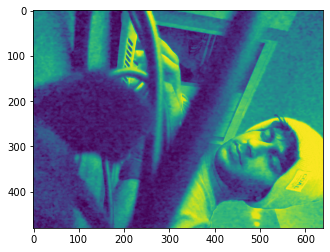

In [207]:
plt.imshow(output_img)

In [155]:
del input_buffer, output_buffer
videoIn.release()